# Correlation analysis (article version)

In this notebook we study the correlation between the burned area during the fire season's months and some climate indices for each cluster that has unimodal fire season.

We consider the correlation between the sum of the burned area of the fire season's months and the average of the indices in the previous months. The two time series have been previously detrended.

We consider the following climate indices: NAO, EA, WP, PNA, EA/WR, SCAND, POLEUR, NINO3.4.

We show plots in each section summarizing the results.

We use the functions defined in the file *scripts/correlation_functions.R*

In [1]:
setwd("..")

In [2]:
source("scripts/correlation_functions_article.R")

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.6.3"
Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract

Loading required package: RColorBrewer


Loading objects:
  coast.lines


In [3]:
# Data required
load("data/Fire/ba_mon_time_series_masked.Rdata", verbose = T)
load("data/fireSeason_def_2.Rdata", verbose = T)

Loading objects:
  masked_coords
  dates
  masked_ba_series
Loading objects:
  fireSeason_def_2


## Data loading

We check that all the indices have been standarised used the period between 1981 and 2010. NIN03.4 and ONI have not, so we standarise them.

In [4]:
nino34 = read.table("data/CPC/nina34.anom.data.txt", skip = 3, nrows = 72)
colnames(nino34) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
nino34[,-1] = (nino34[,-1] - mean(as.matrix(nino34[32:61,-1]))) / sd(as.matrix(nino34[32:61,-1]))

In [5]:
nao = read.table("data/CPC/nao_index.tim.txt", skip = 8, header = T)
nao <- nao %>% spread(MONTH,INDEX)
colnames(nao) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(nao[32:61,-1]))
sd(as.matrix(nao[32:61,-1]))

[1] 8.333333e-05

[1] 1.001653

In [6]:
poleur = read.table("data/CPC/poleur_index.tim", skip = 8, header = T)
poleur <- poleur %>% spread(MONTH,INDEX)
colnames(poleur) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(poleur[32:61,-1]))
sd(as.matrix(poleur[32:61,-1]))

[1] 0.0001388889

[1] 1.001456

In [7]:
ea = read.table("data/CPC/ea_index.tim.txt", skip = 8, header = T)
ea <- ea %>% spread(MONTH,INDEX)
colnames(ea) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(ea[32:61,-1]))
sd(as.matrix(ea[32:61,-1]))

[1] -0.0001388889

[1] 1.001423

In [8]:
eawr = read.table("data/CPC/eawr_index.tim.txt", skip = 8, header = T)
eawr <- eawr %>% spread(MONTH,INDEX)
colnames(eawr) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(eawr[32:61,-1]))
sd(as.matrix(eawr[32:61,-1]))

[1] -0.0001666667

[1] 1.001118

In [9]:
pna = read.table("data/CPC/pna_index.tim.txt", skip = 8, header = T)
pna <- pna %>% spread(MONTH,INDEX)
colnames(pna) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(pna[32:61,-1]))
sd(as.matrix(pna[32:61,-1]))

[1] 0.0003333333

[1] 1.001209

In [10]:
scand = read.table("data/CPC/scand_index.tim.txt", skip = 8, header = T)
scand <- scand %>% spread(MONTH,INDEX)
colnames(scand) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(scand[32:61,-1]))
sd(as.matrix(scand[32:61,-1]))

[1] 2.777778e-05

[1] 1.001176

In [11]:
wp = read.table("data/CPC/wp_index.tim.txt", skip = 8, header = T)
wp <- wp %>% spread(MONTH,INDEX)
colnames(wp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(wp[32:61,-1]))
sd(as.matrix(wp[32:61,-1]))

[1] 0.0003055556

[1] 1.001415

In [12]:
corr.df = masked_coords
list.cpcs = list(nino34, nao, poleur, ea, eawr, pna, scand, wp)
list.names = c('nino34', 'nao', 'poleur', 'ea', 'eawr', 'pna', 'scand', 'wp')

# Correlation per cluster

## LT1

### 1 month duration

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

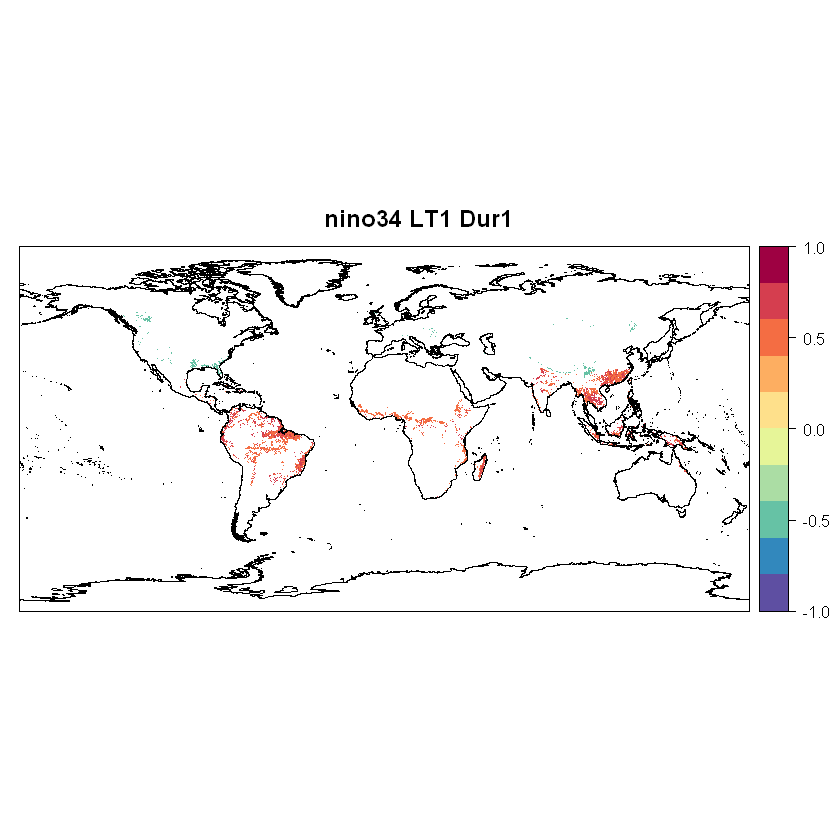

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

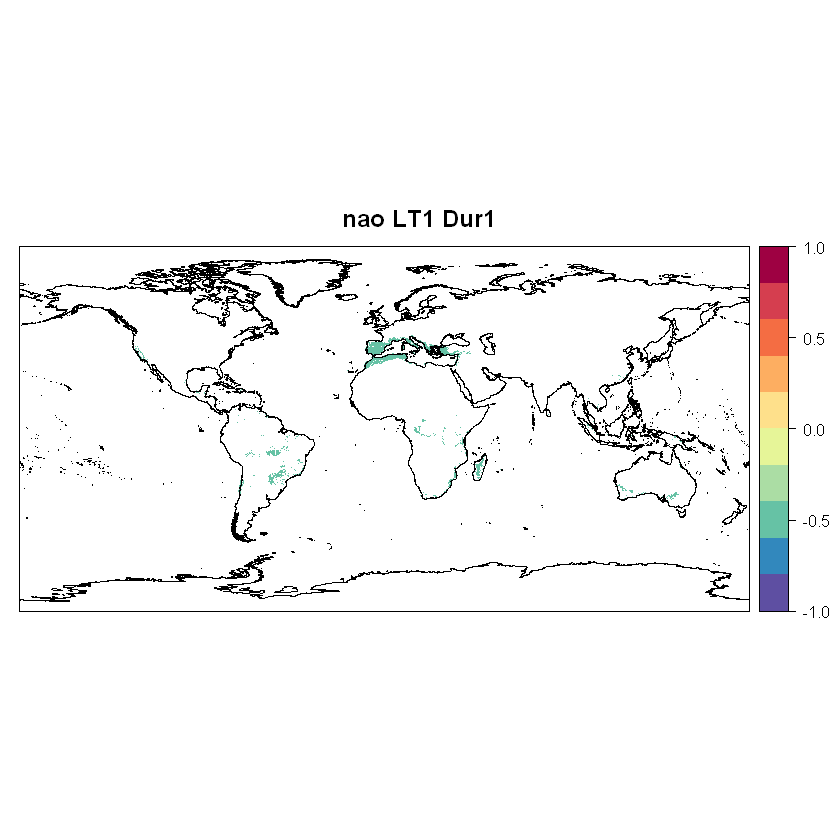

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

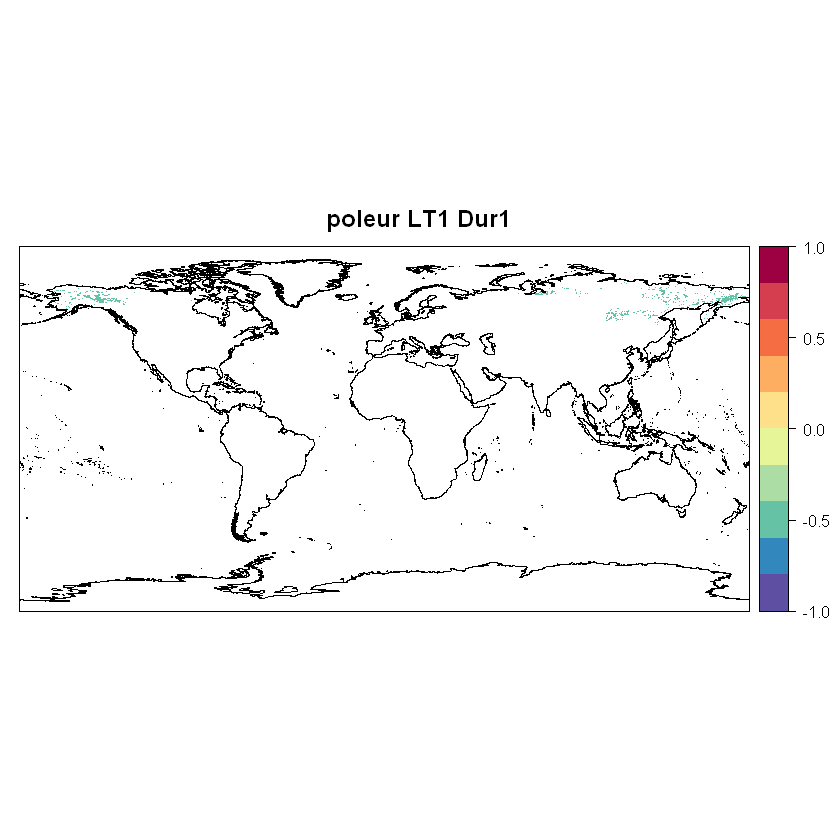

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

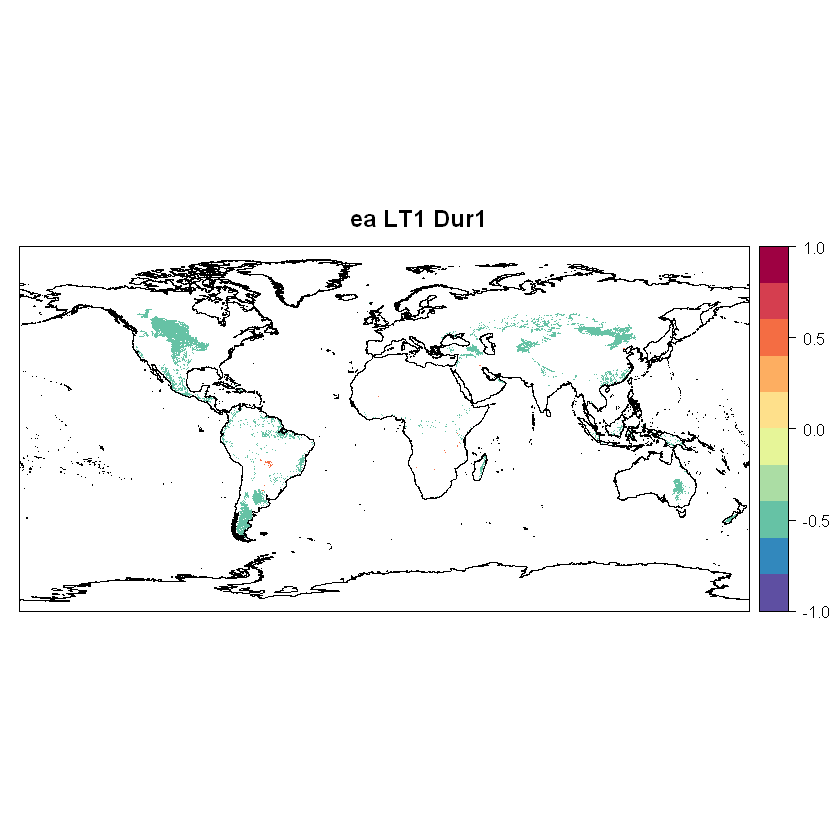

Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

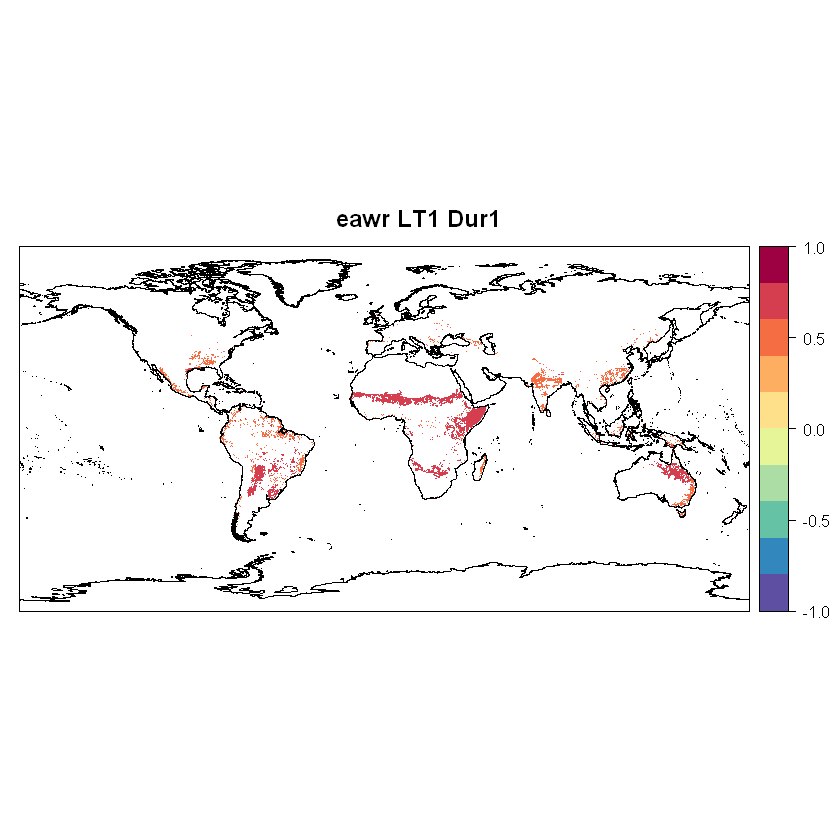

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

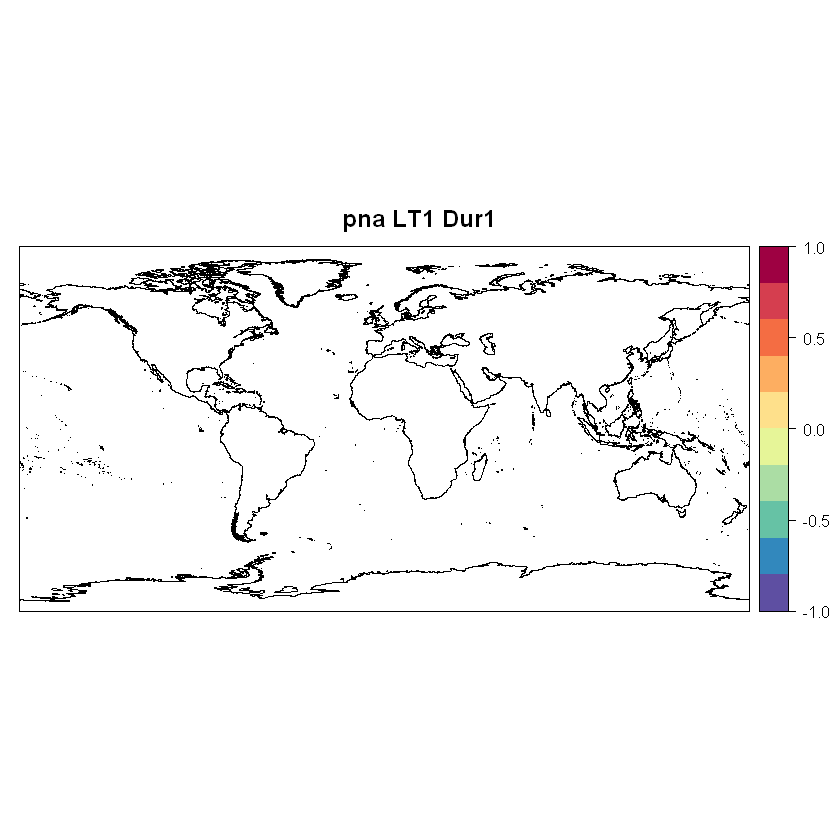

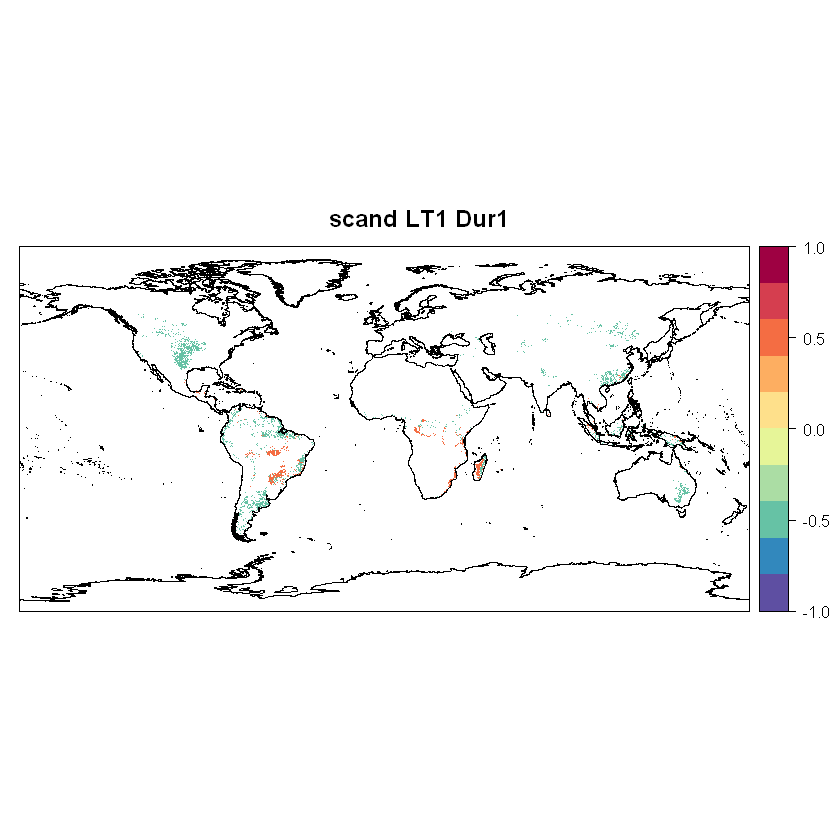

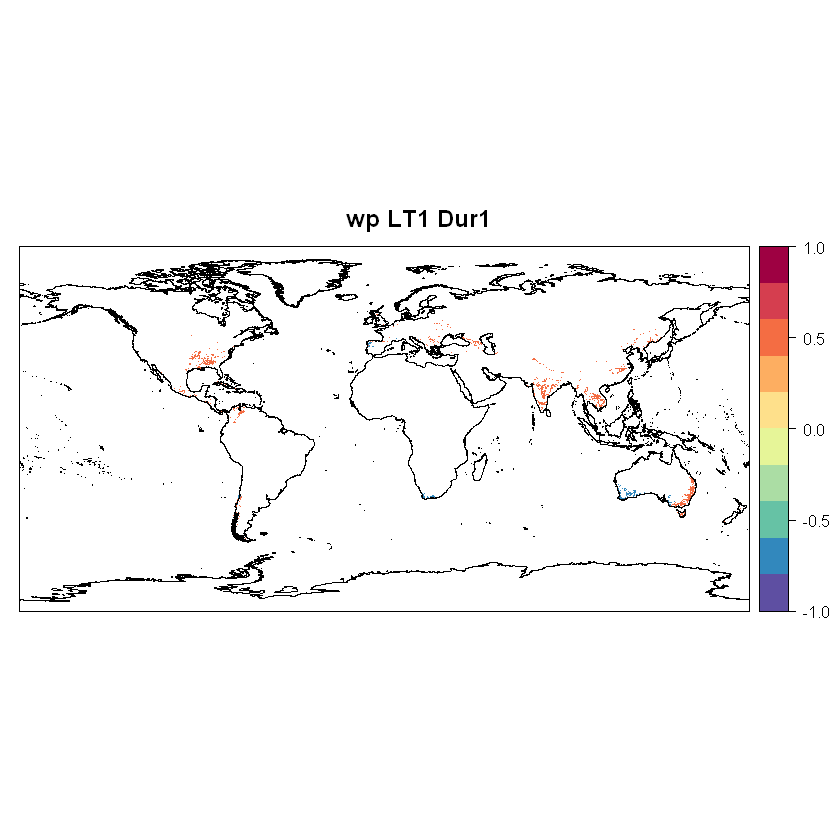

In [13]:
corr.df.lt1.1 = masked_coords
for (i in 1:8){
    corr.df.lt1.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, list.cpcs[[i]],
                                     list.names[i], corr.df.lt1.1, lt=1, duration=1, mode='unimodal')
}
save(corr.df.lt1.1, file = 'data/Correlation/corrDfArticleLT1D1.Rdata')

### 2 months duration

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

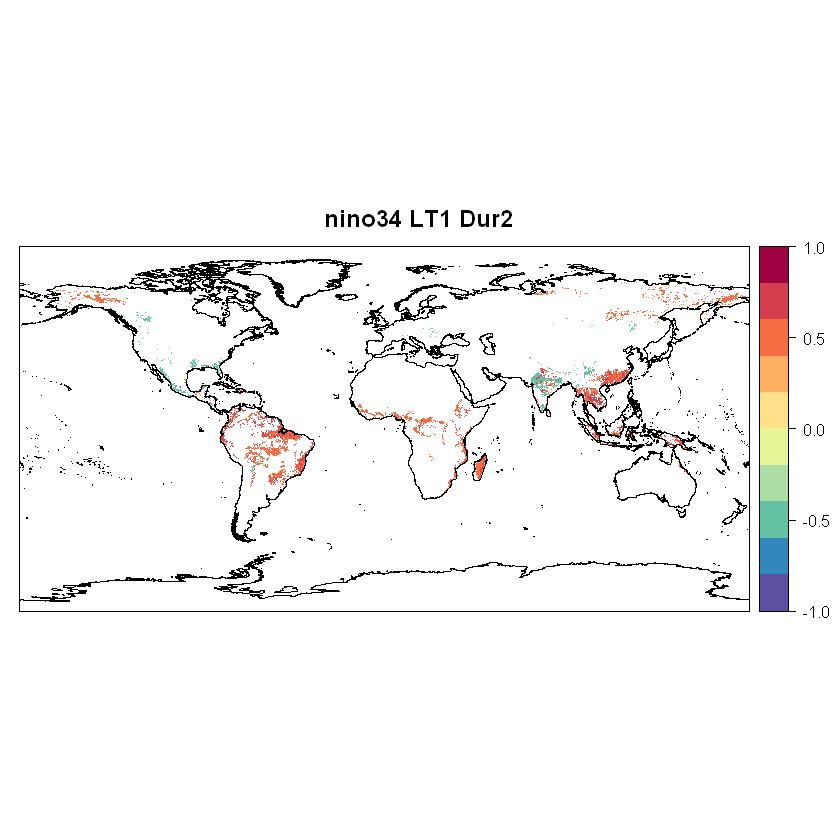

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

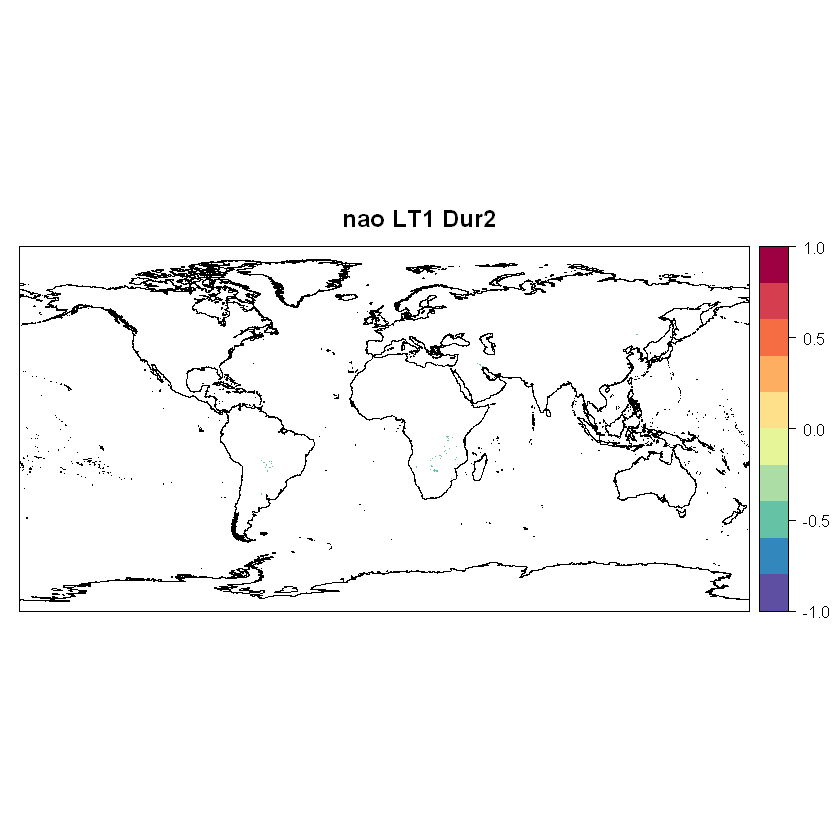

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

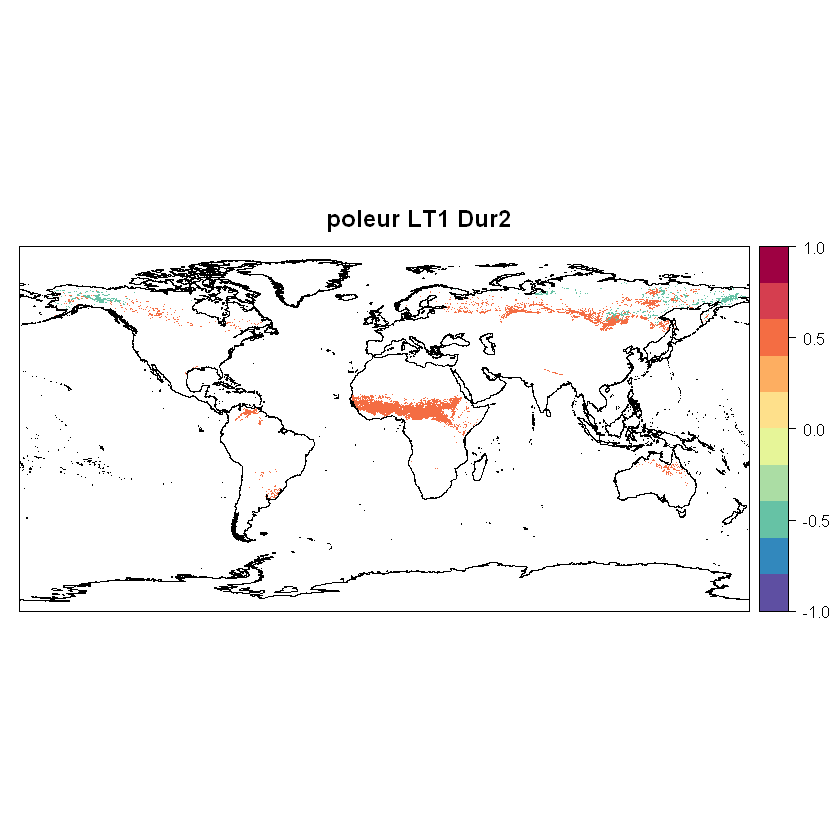

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

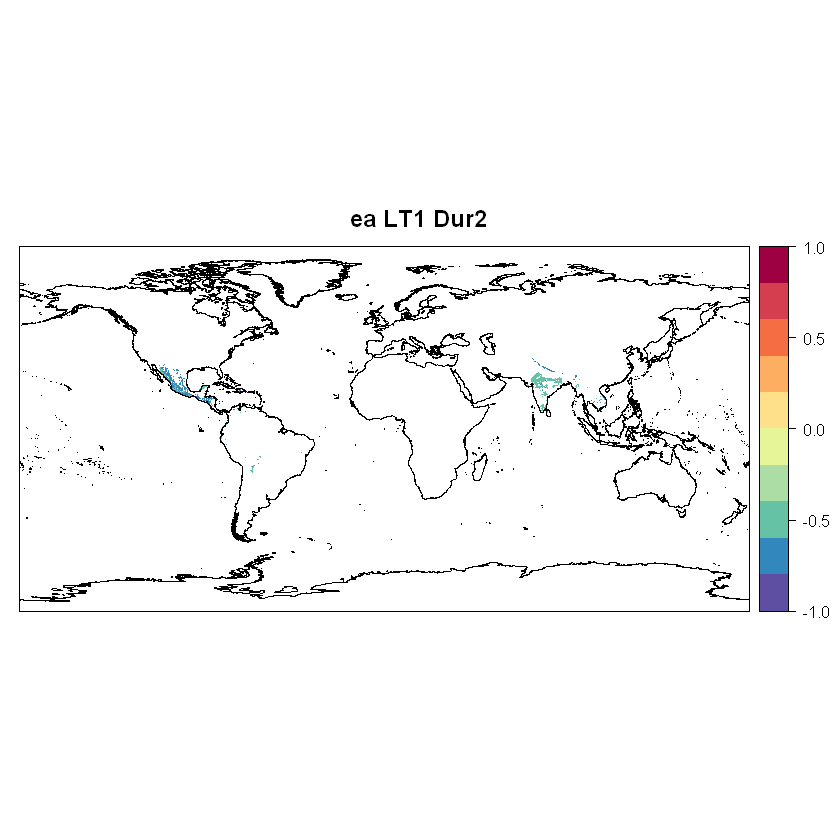

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

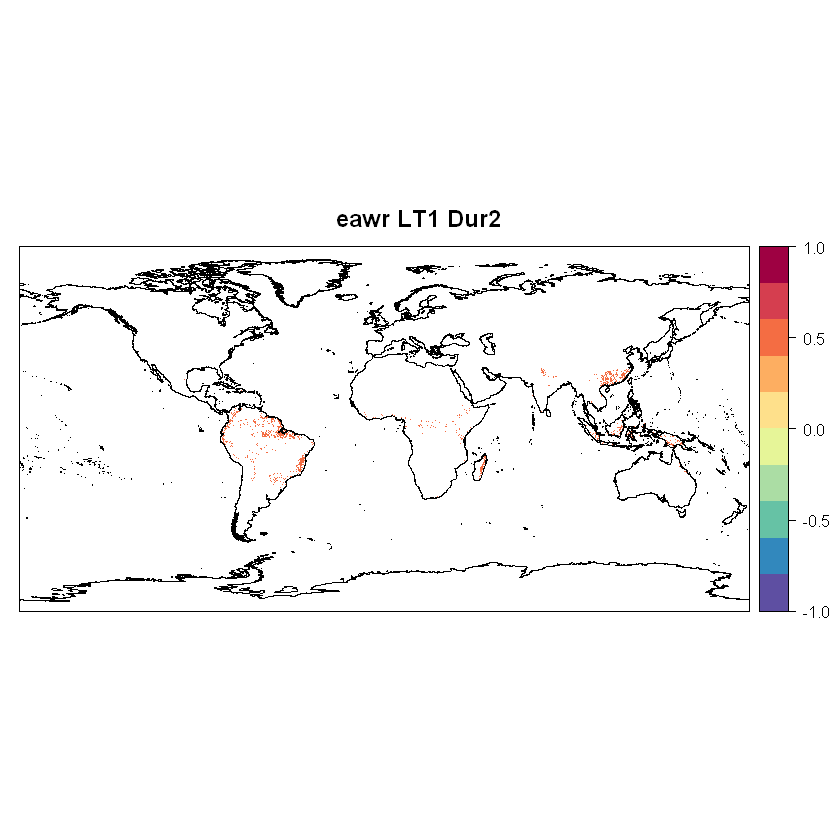

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

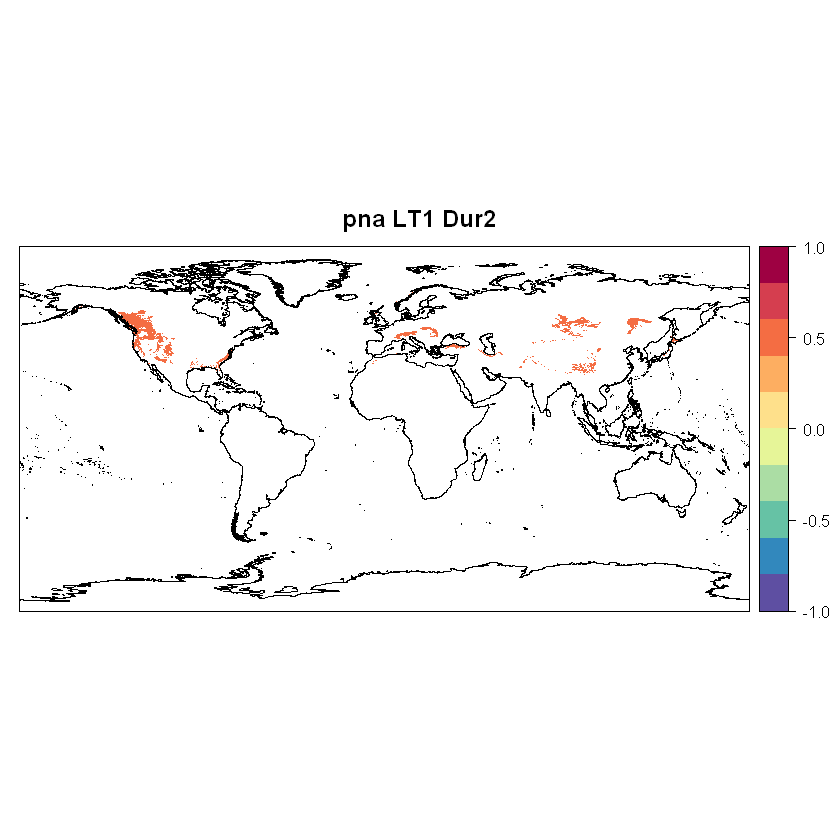

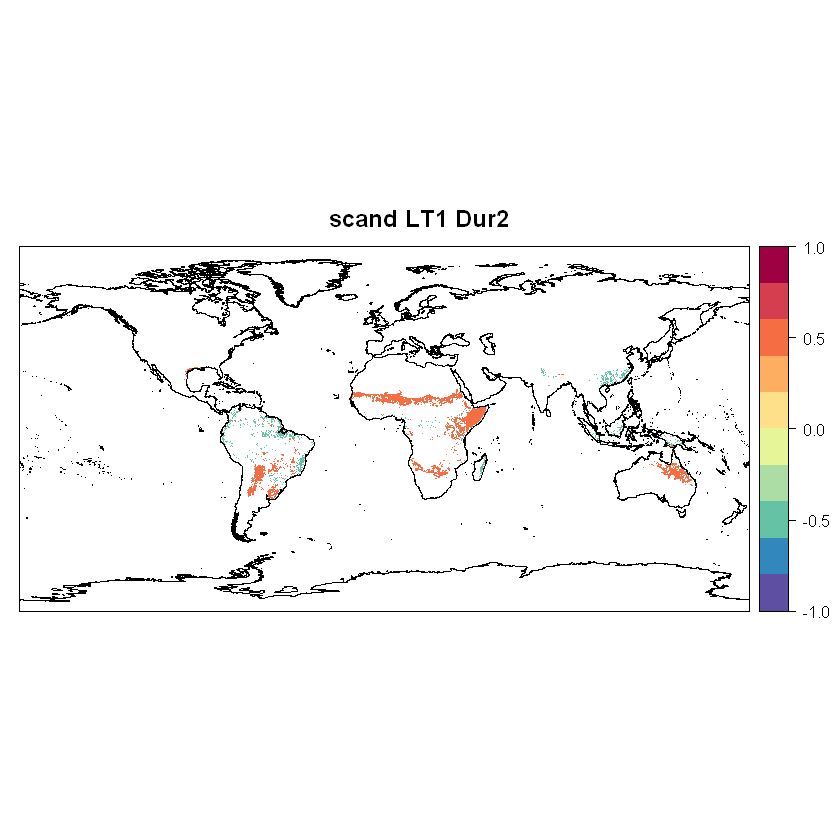

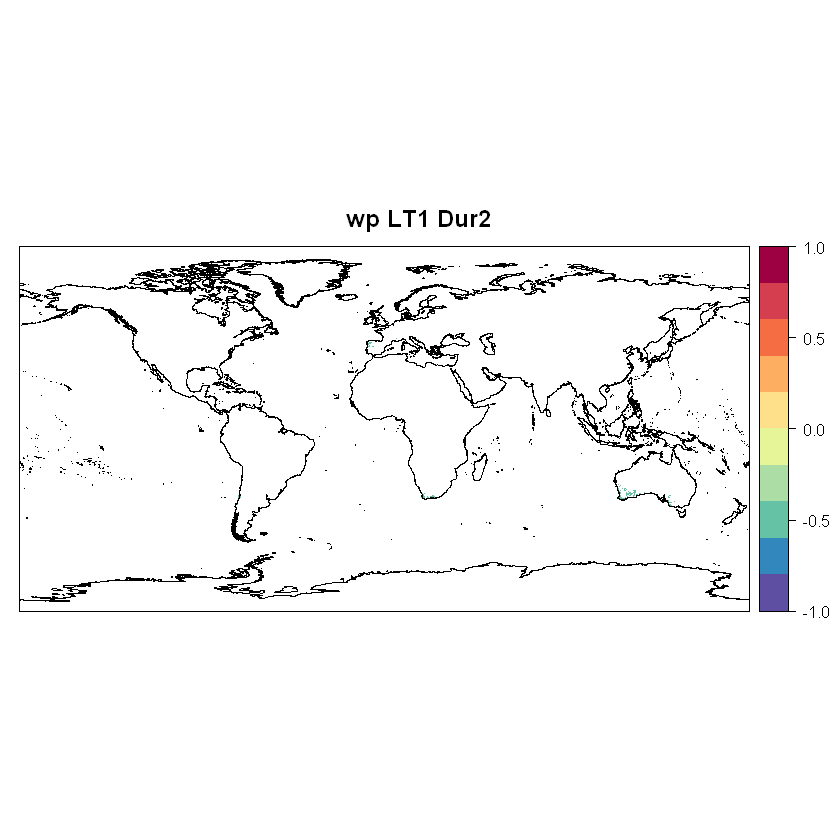

In [14]:
corr.df.lt1.2 = masked_coords
for (i in 1:8){
    corr.df.lt1.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, list.cpcs[[i]],
                                     list.names[i], corr.df.lt1.2, lt=1, duration=2, mode='unimodal')
}
save(corr.df.lt1.2, file = 'data/Correlation/corrDfArticleLT1D2.Rdata')

### 3 months duration

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

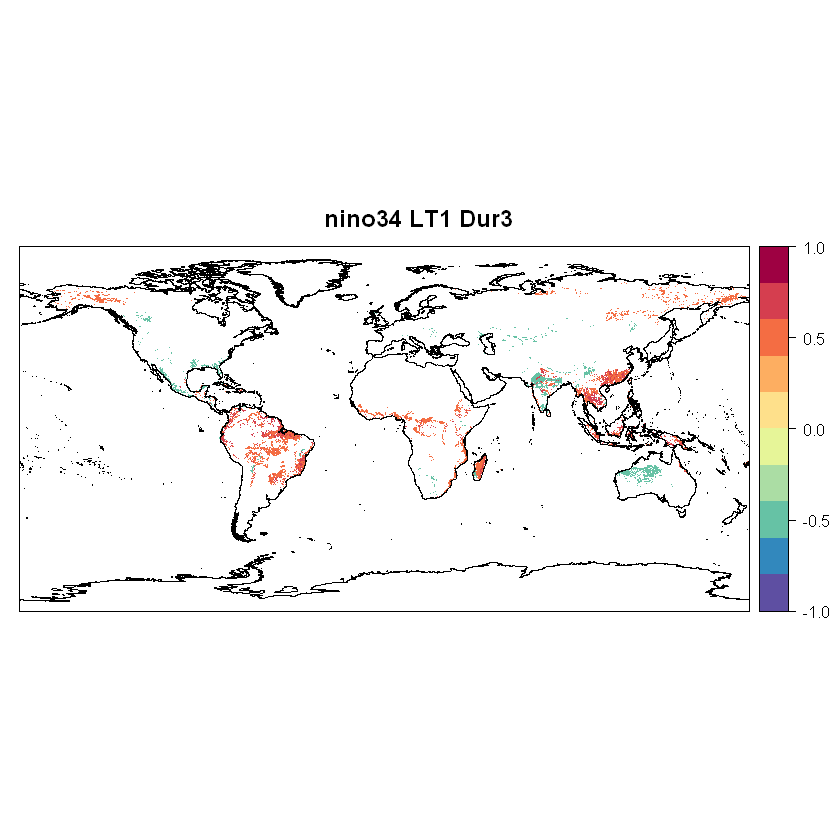

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

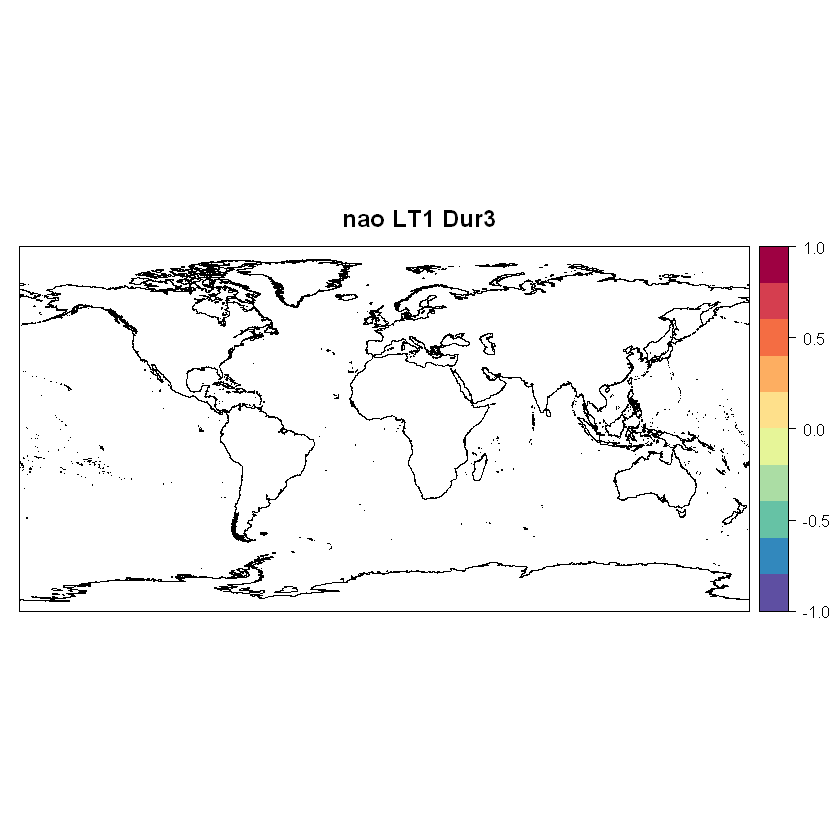

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

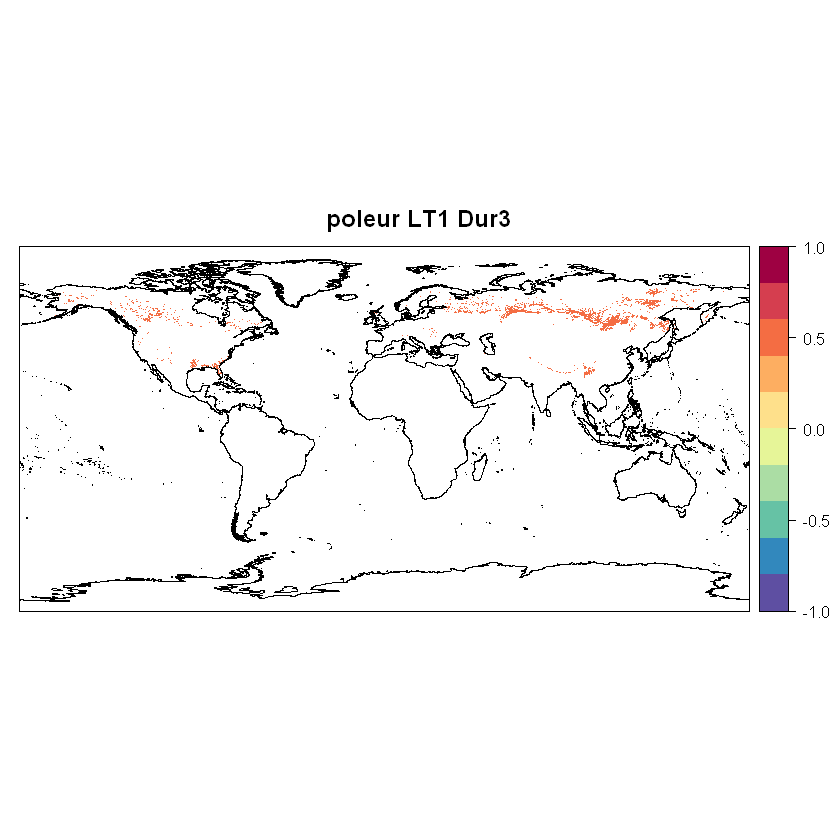

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

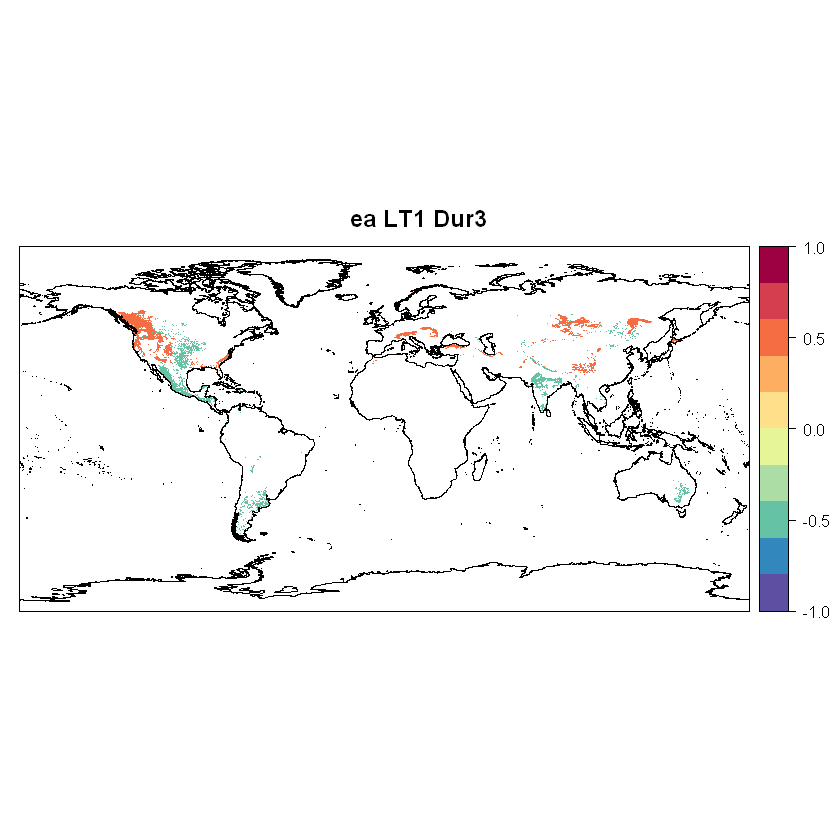

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

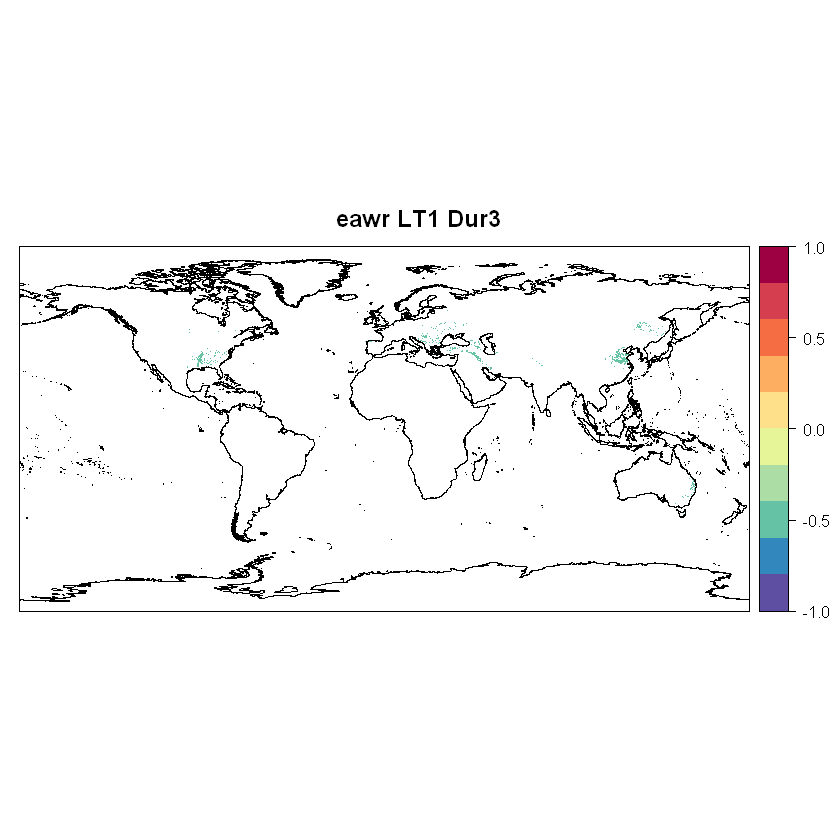

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

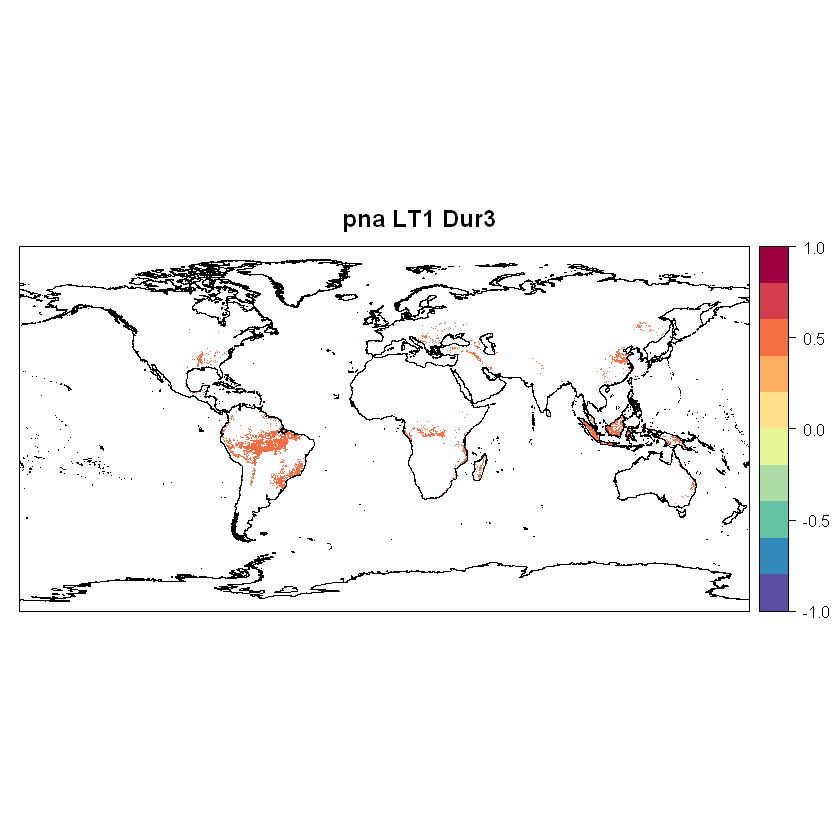

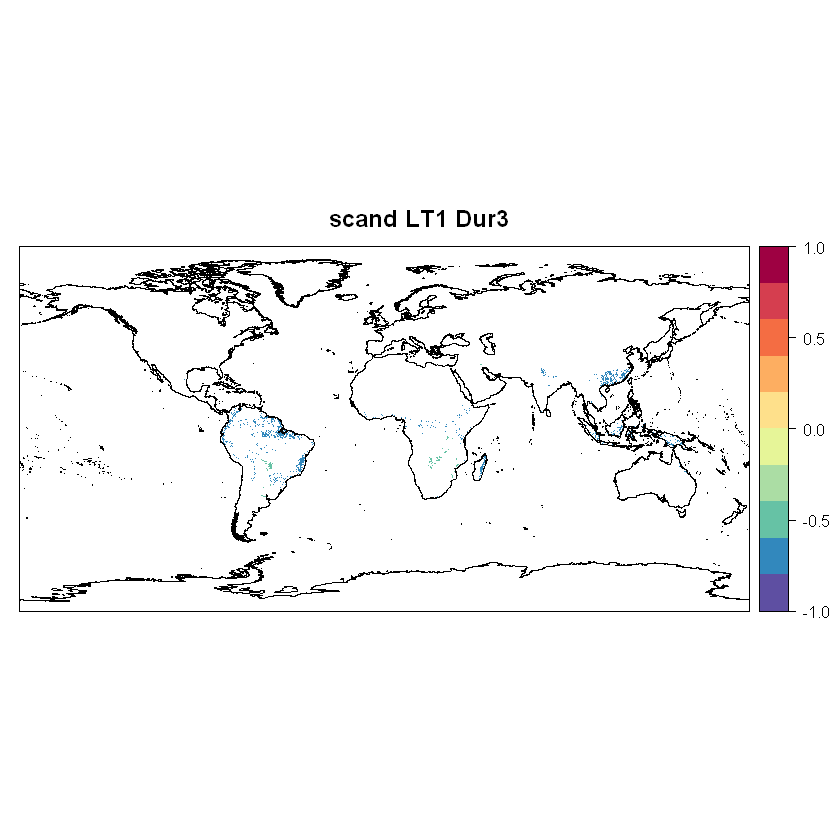

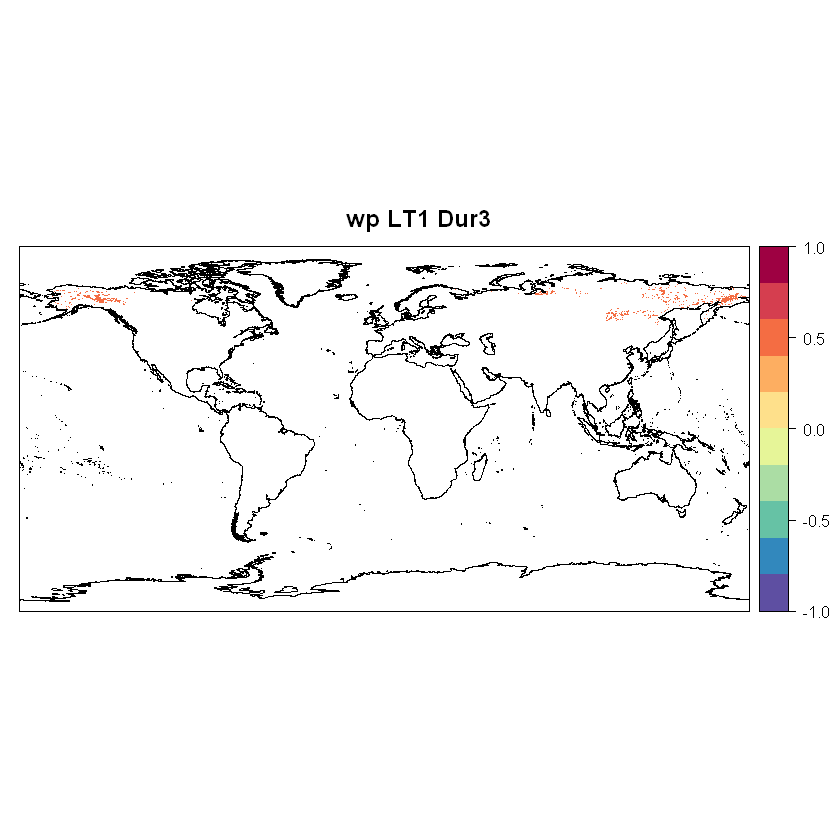

In [15]:
corr.df.lt1.3 = masked_coords
for (i in 1:8){
    corr.df.lt1.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, list.cpcs[[i]], 
                                     list.names[i], corr.df.lt1.3, lt=1, duration=3, mode='unimodal')
}
save(corr.df.lt1.3, file = 'data/Correlation/corrDfArticleLT1D3.Rdata')

## LT2
### 1 month duration

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

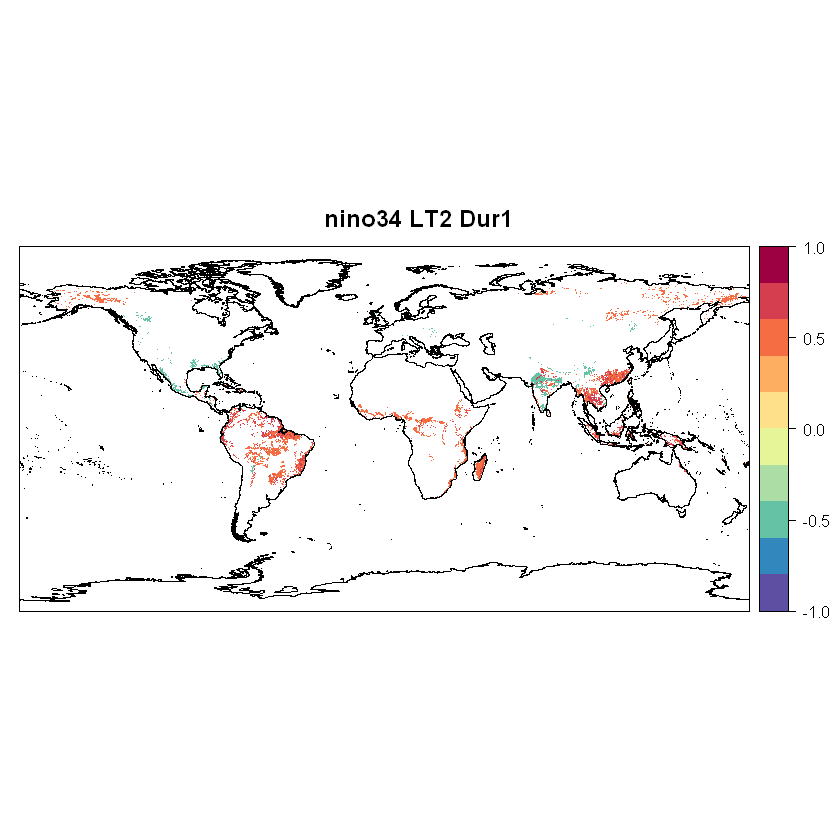

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

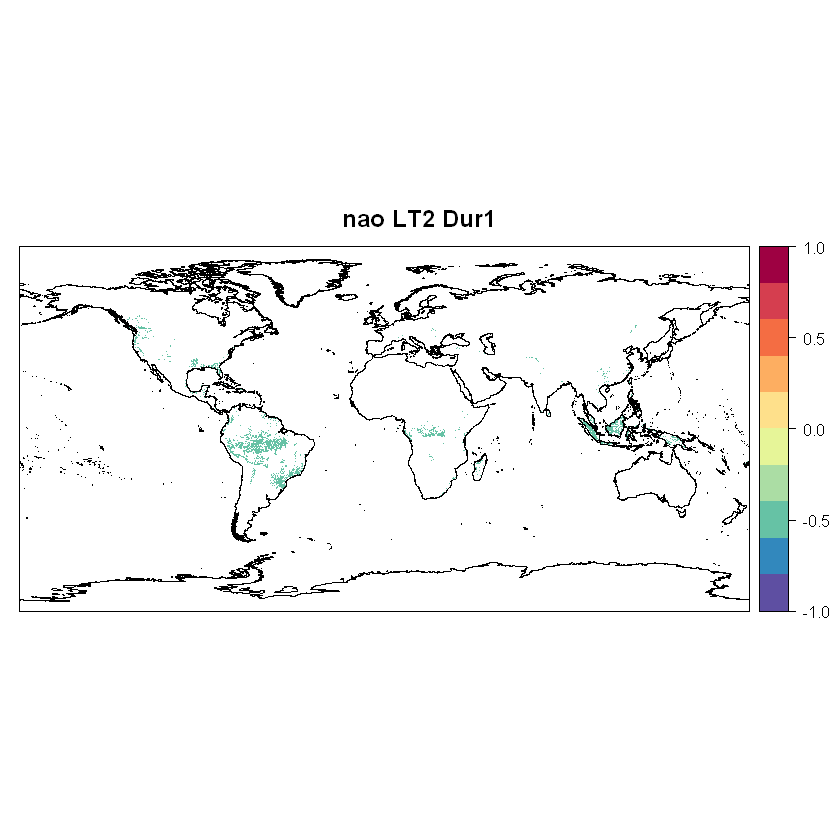

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

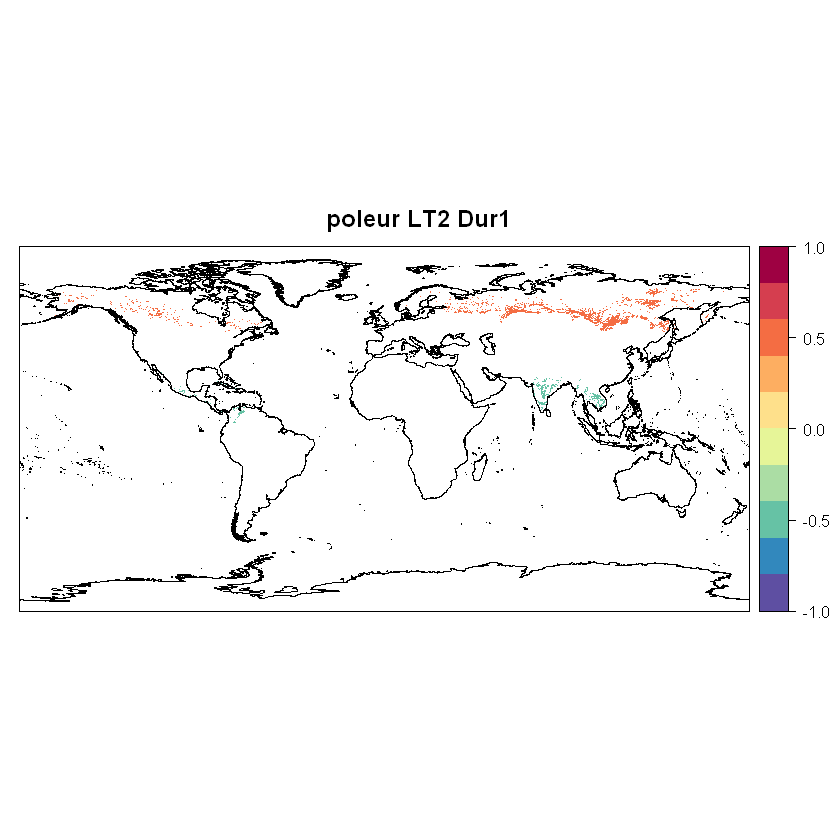

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

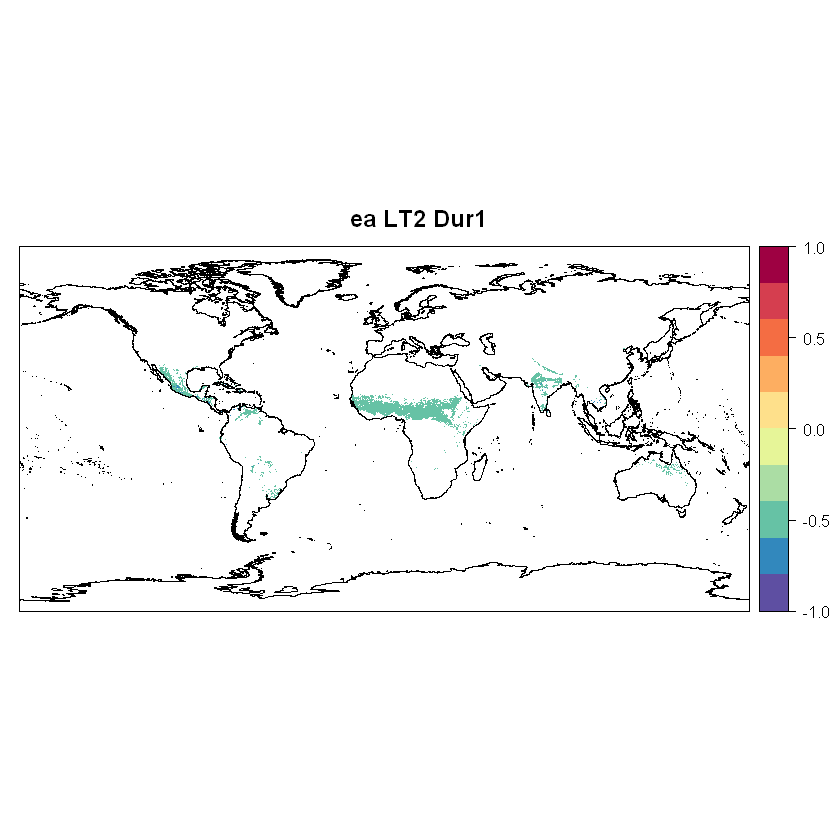

Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

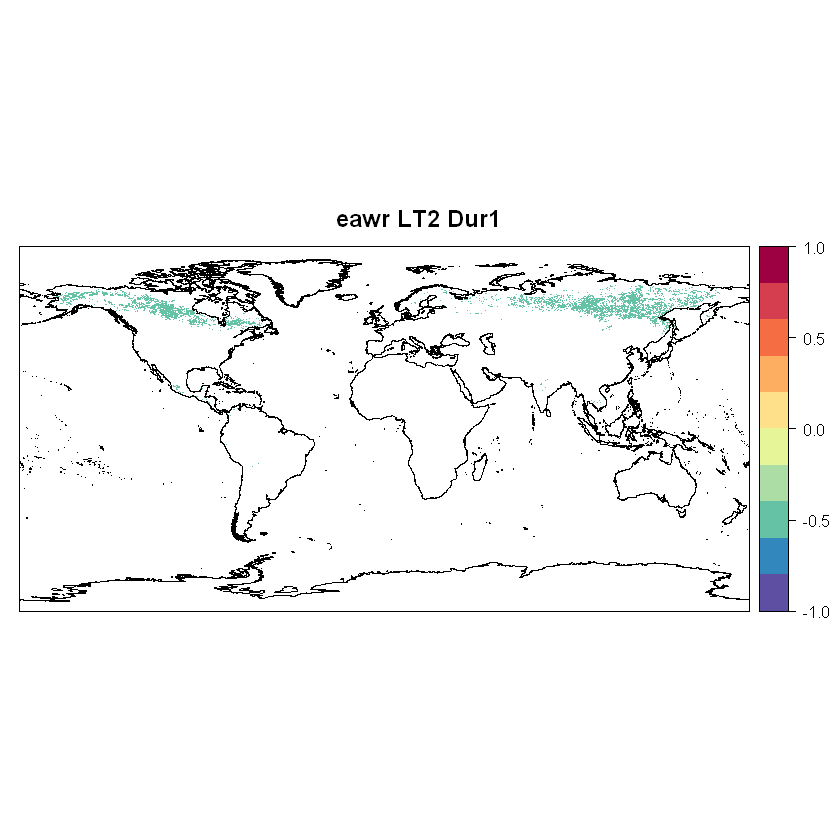

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

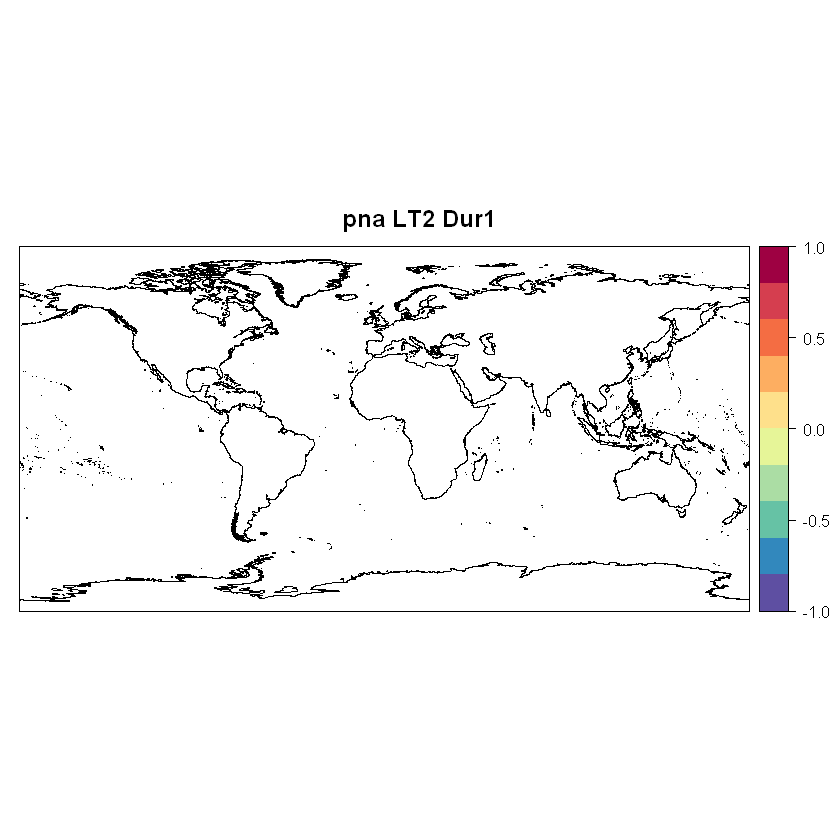

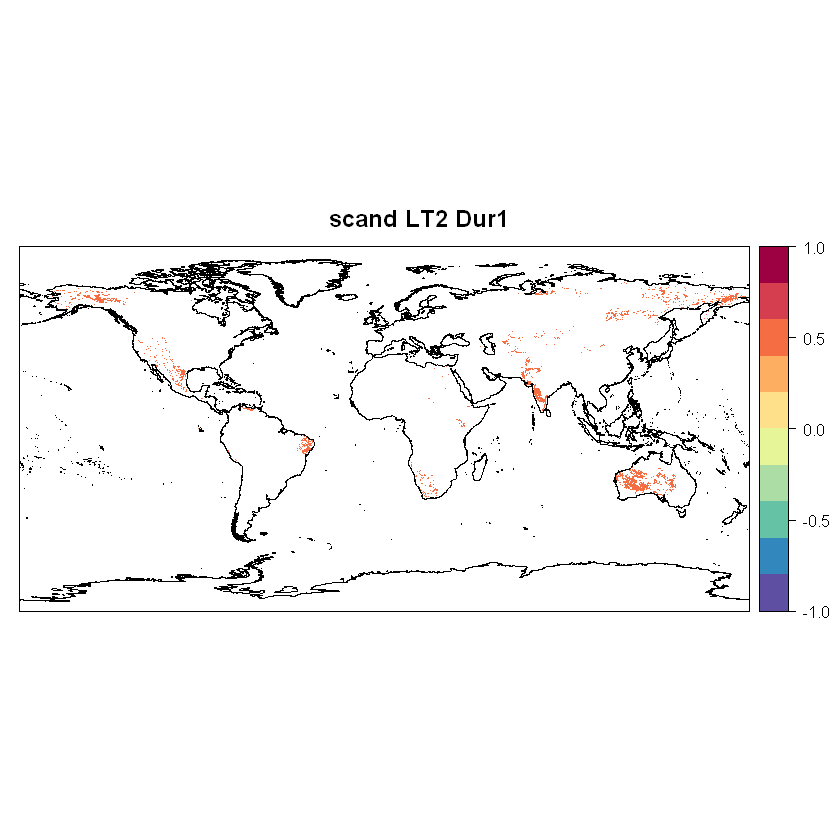

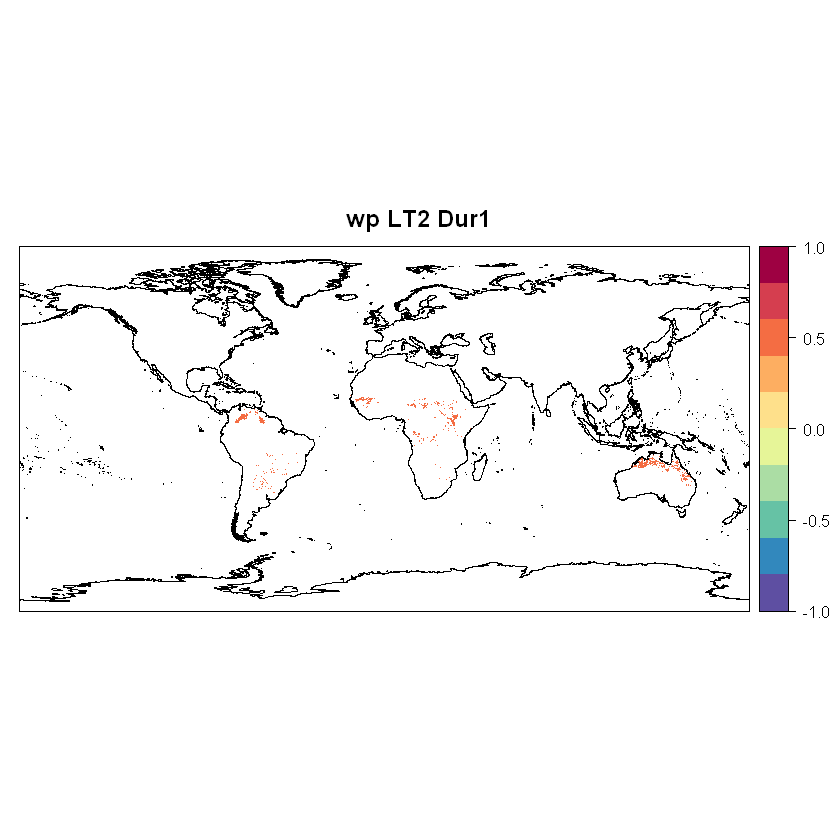

In [16]:
corr.df.lt2.1 = masked_coords
for (i in 1:8){
    corr.df.lt2.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, list.cpcs[[i]], 
                                     list.names[i], corr.df.lt2.1, lt=2, duration=1, mode='unimodal')
}
save(corr.df.lt2.1, file = 'data/Correlation/corrDfArticleLT2D1.Rdata')

### 2 months duration

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

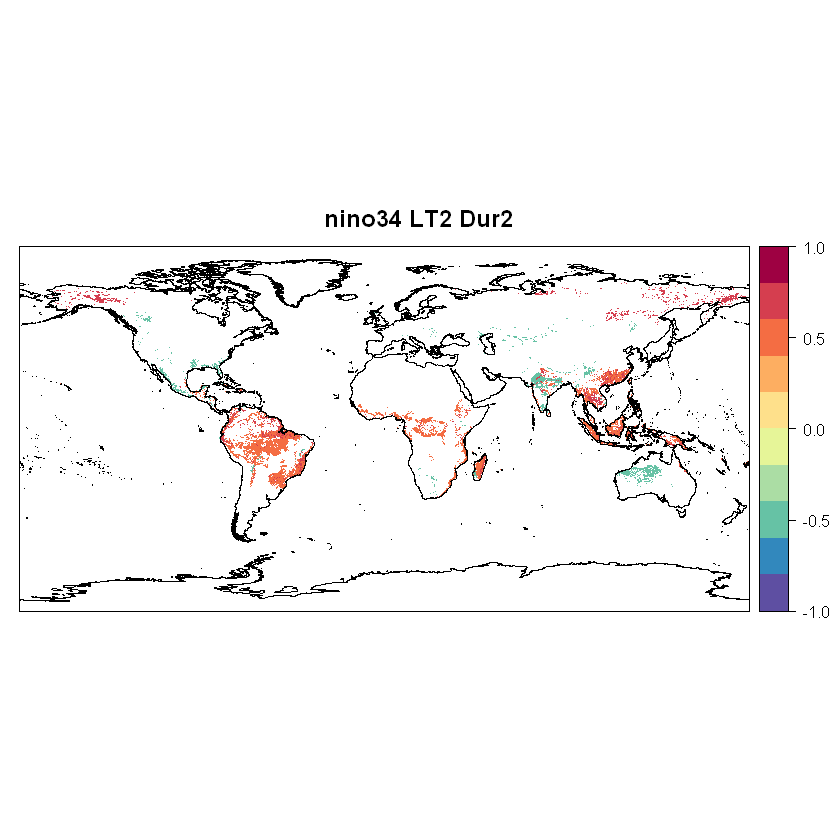

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

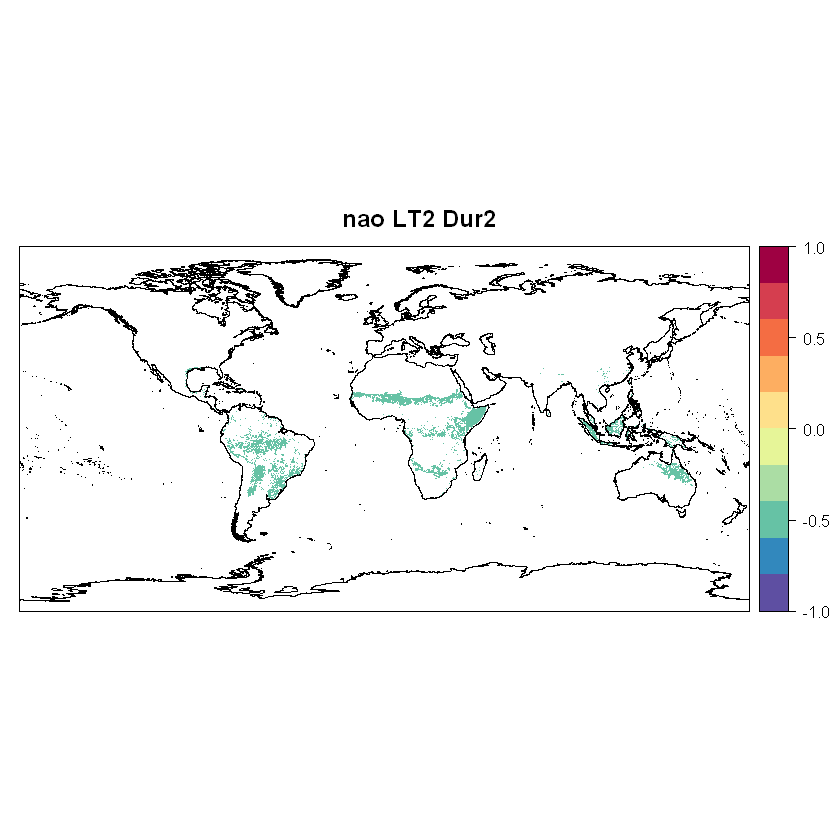

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

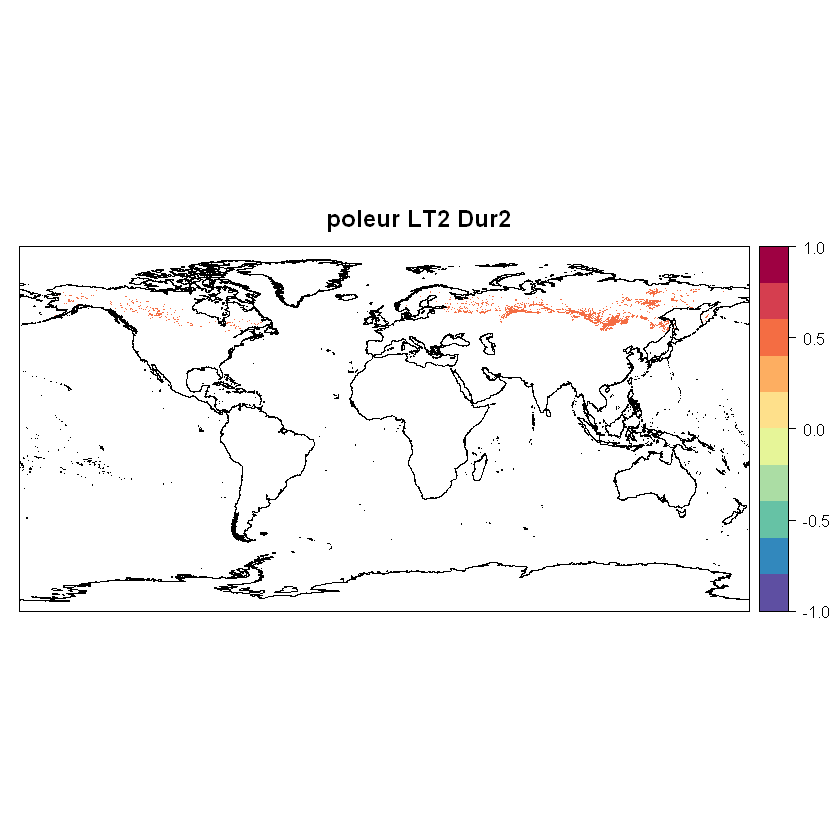

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

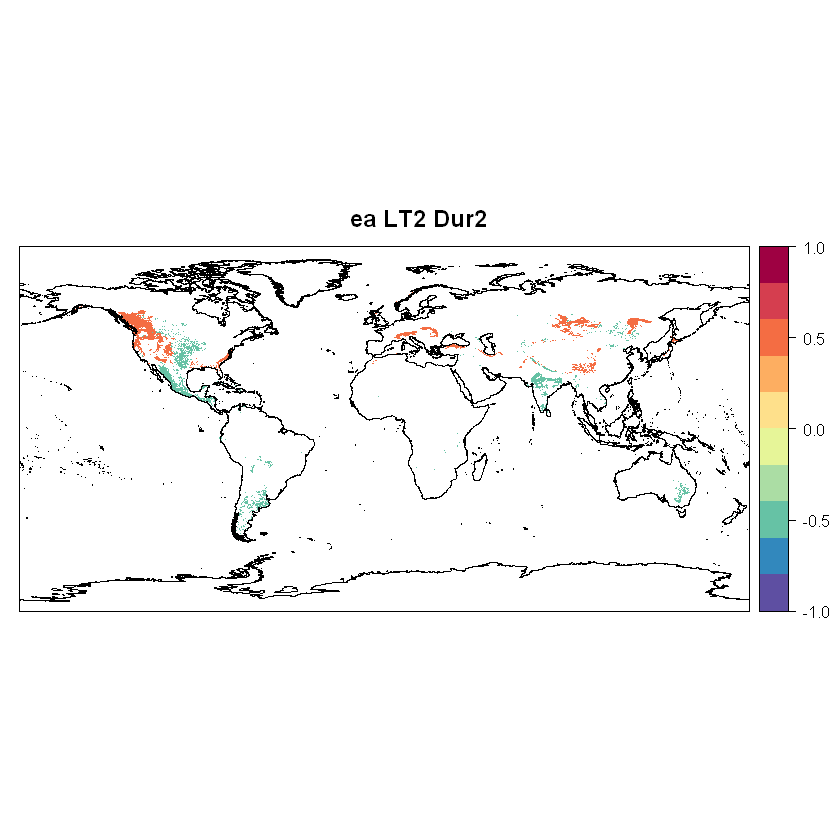

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

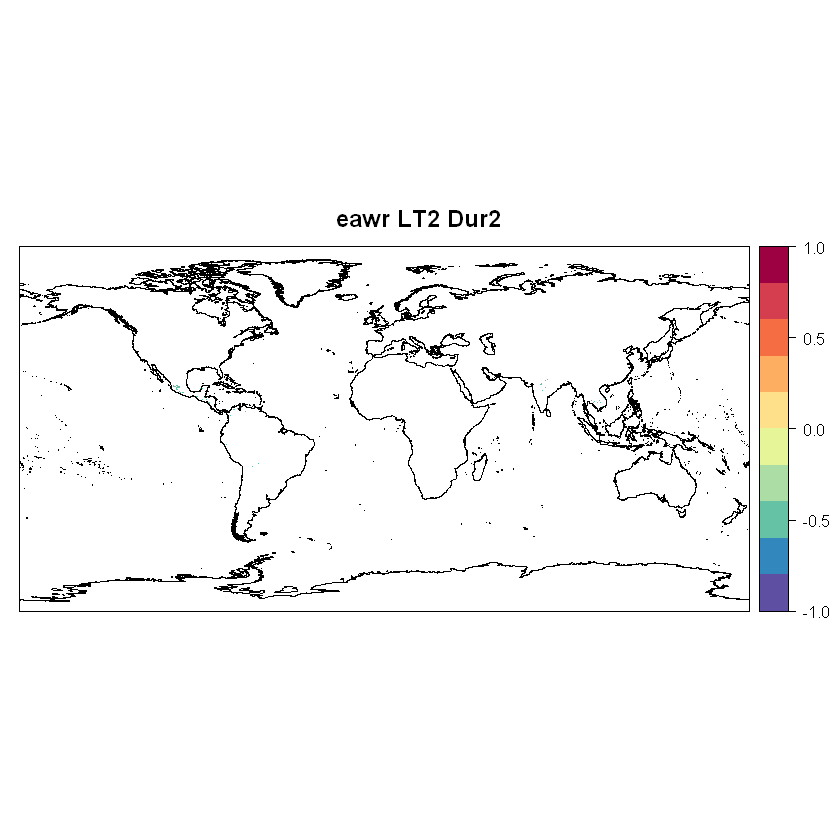

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

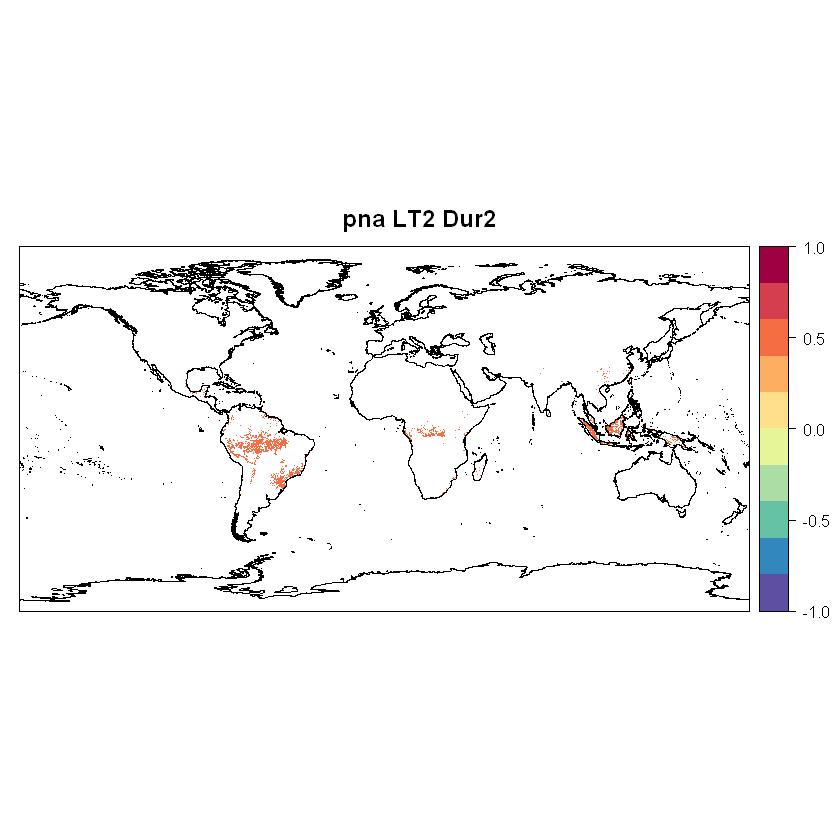

Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

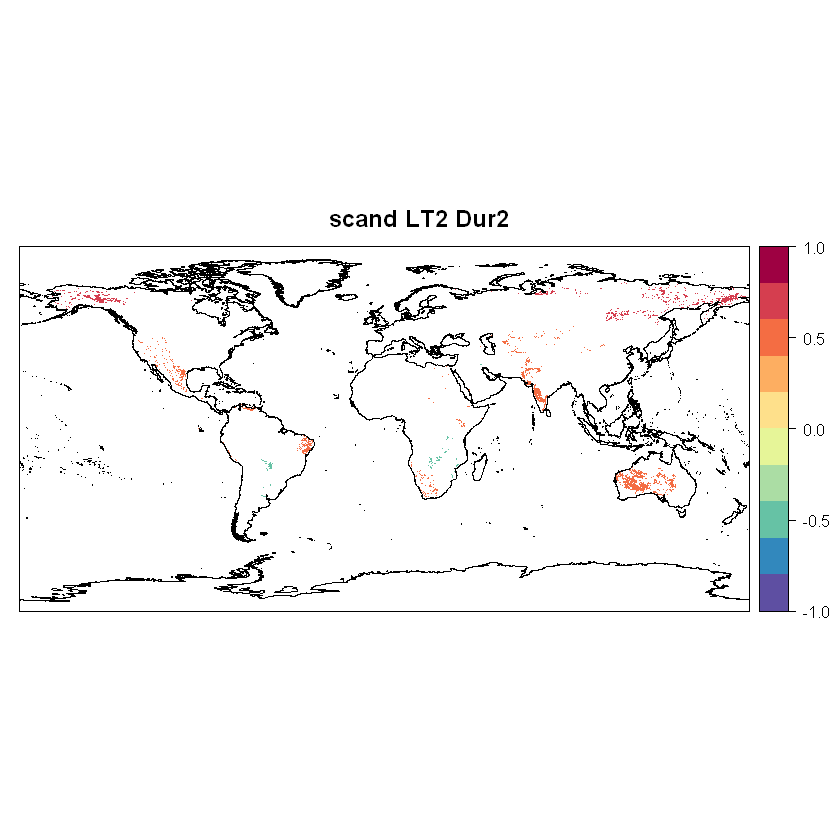

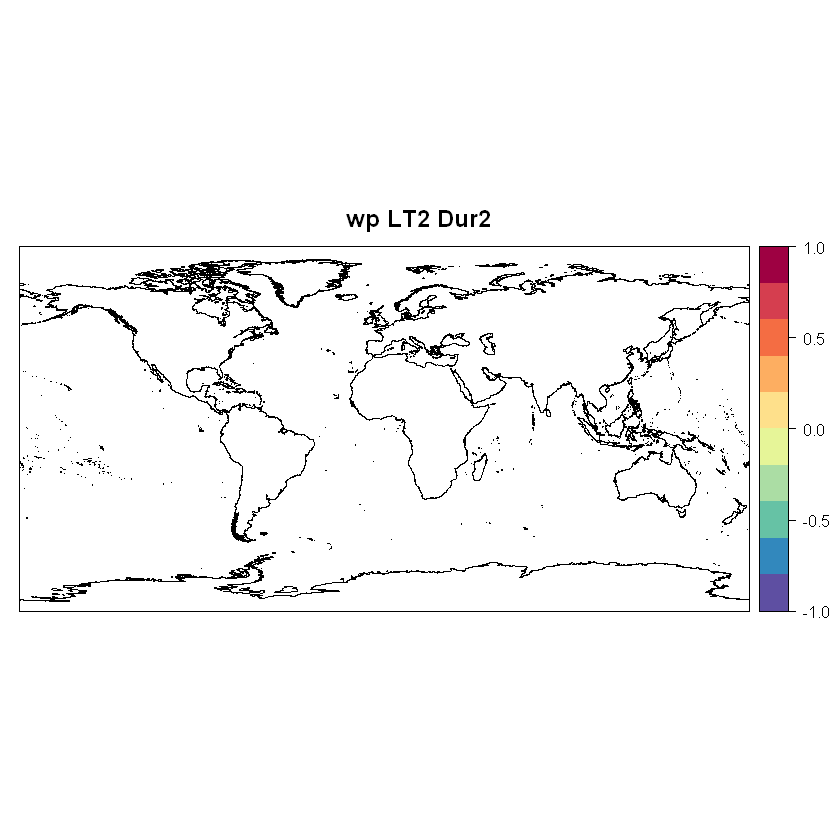

In [17]:
corr.df.lt2.2 = masked_coords
for (i in 1:8){
    corr.df.lt2.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, list.cpcs[[i]],
                                     list.names[i], corr.df.lt2.2, lt=2, duration=2, mode='unimodal')
}
save(corr.df.lt2.2, file = 'data/Correlation/corrDfArticleLT2D2.Rdata')

### 3 months duration

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

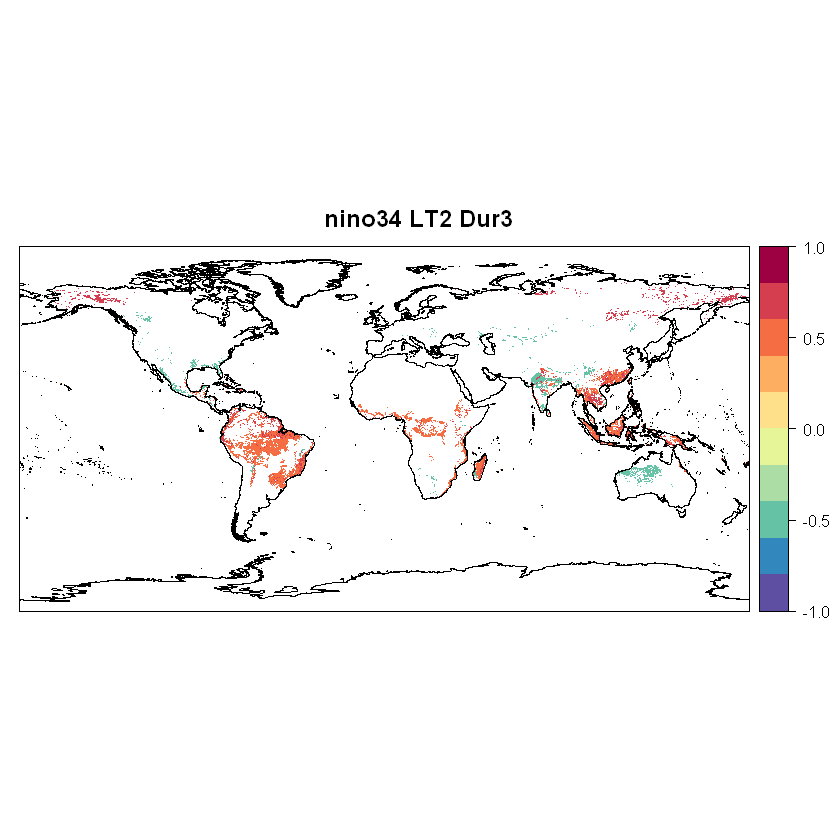

Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

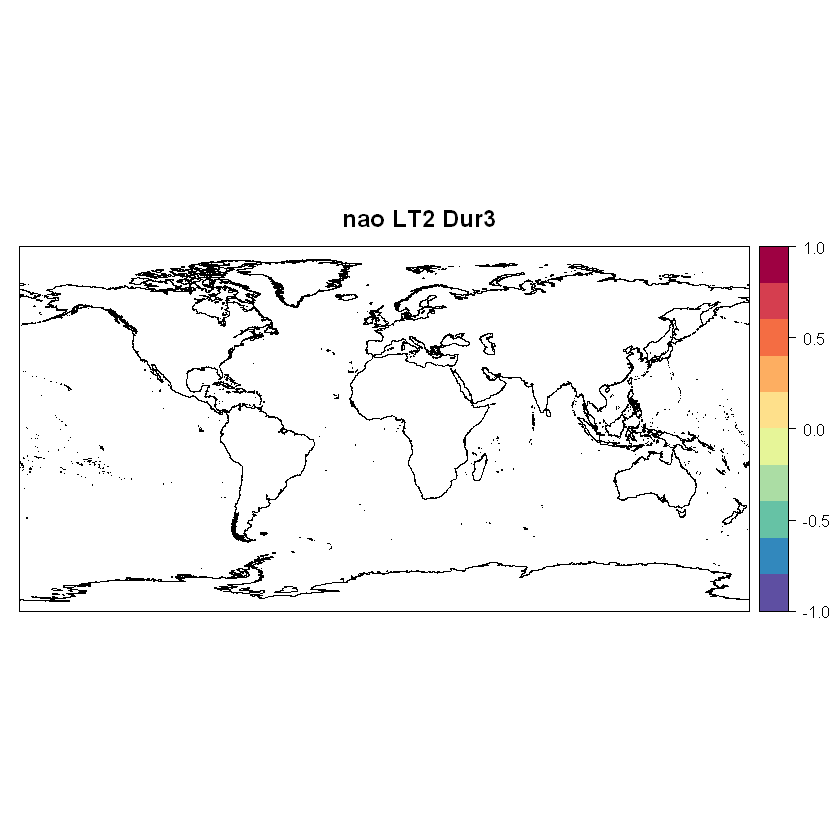

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

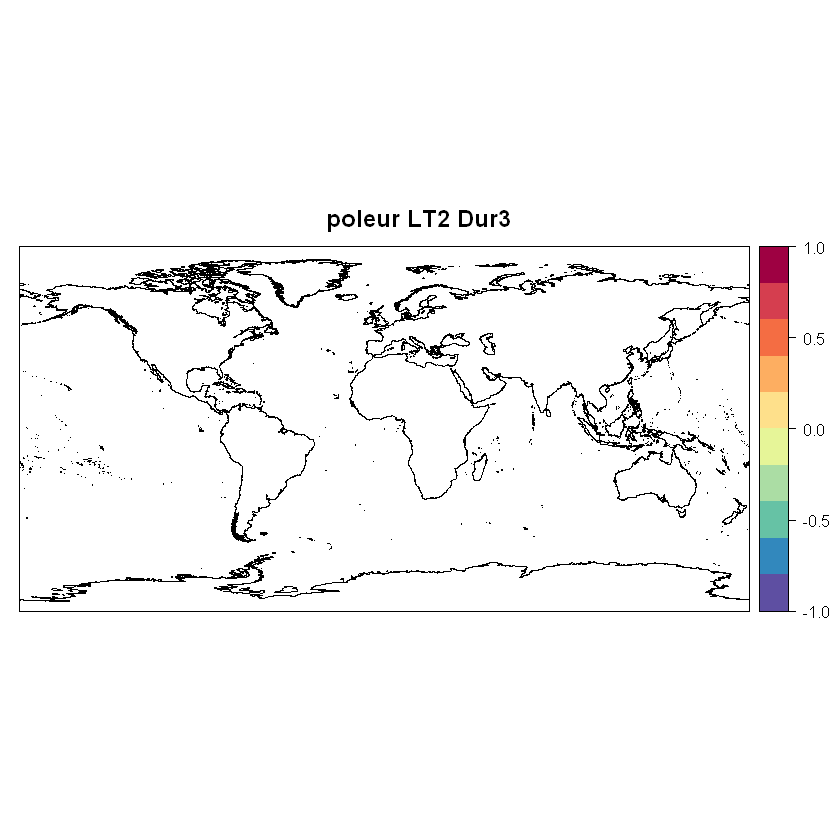

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

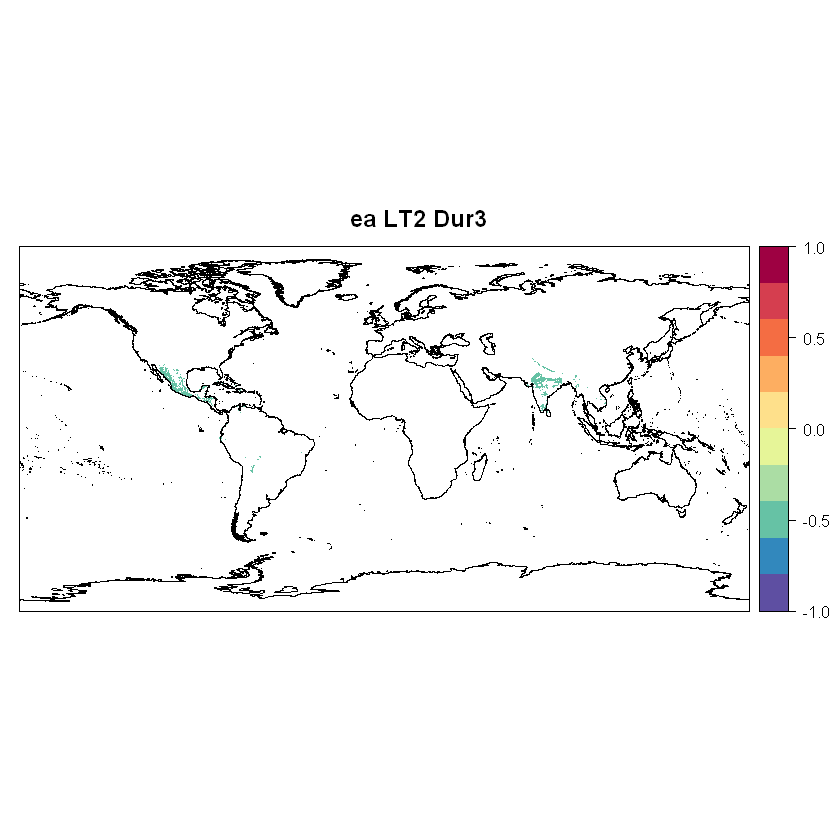

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

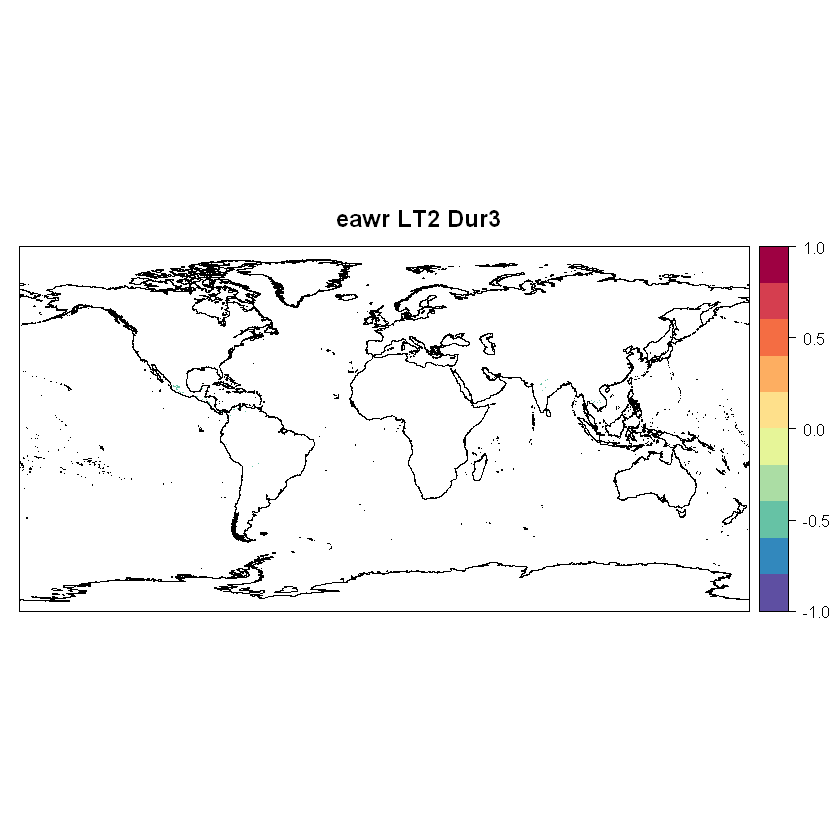

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

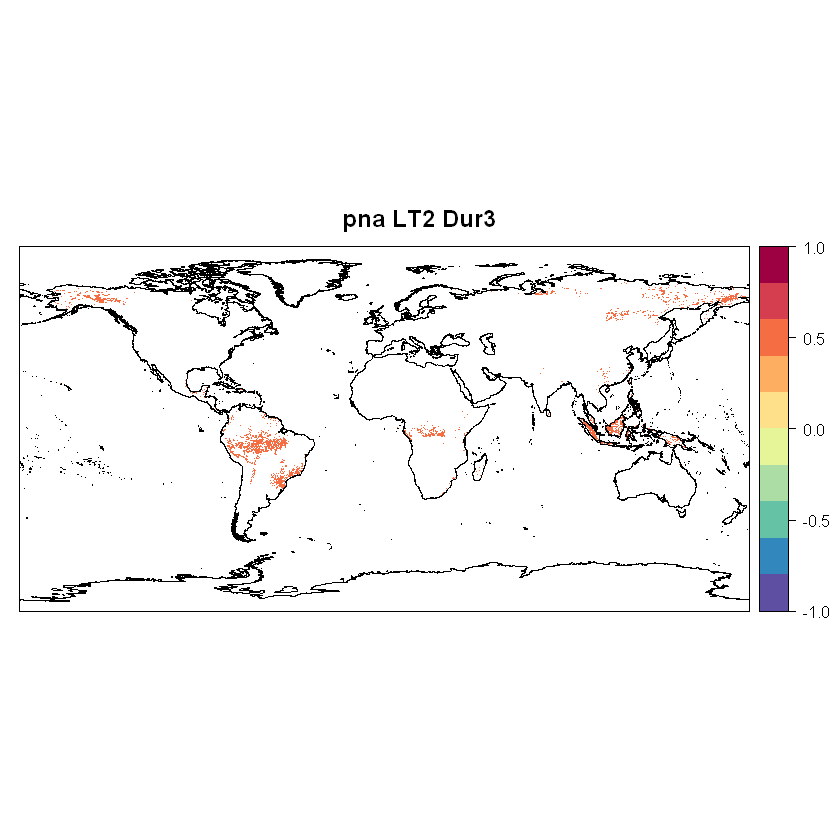

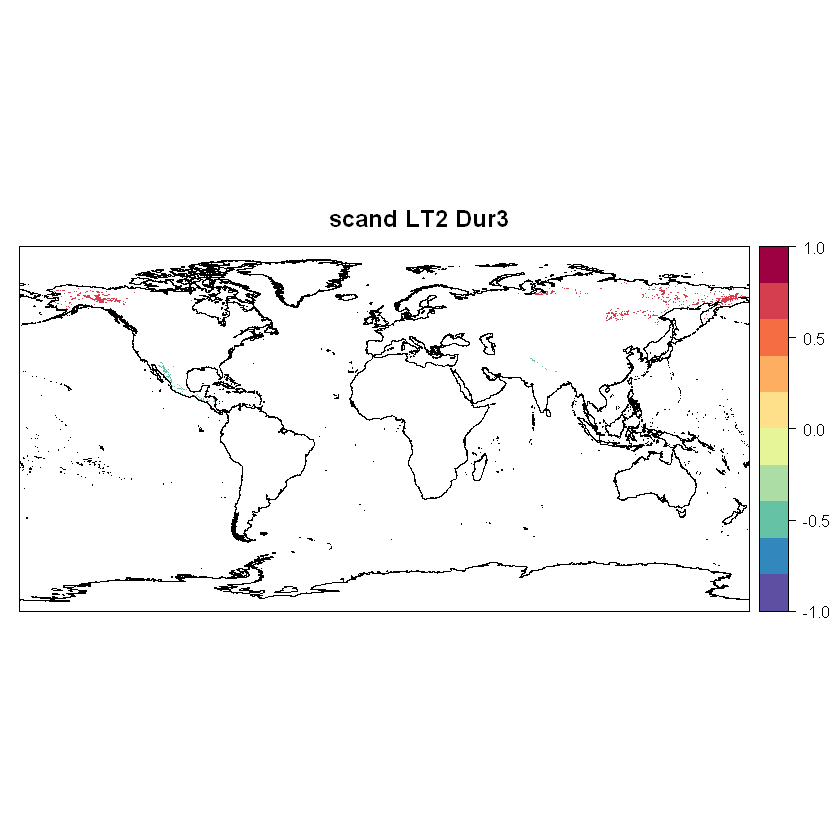

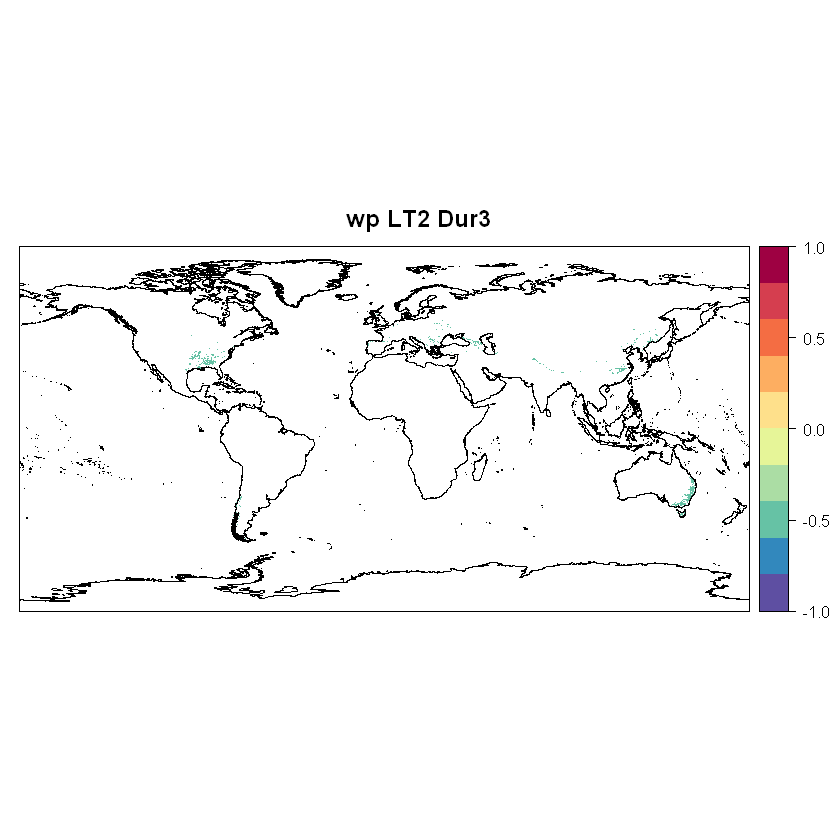

In [18]:
corr.df.lt2.3 = masked_coords
for (i in 1:8){
    corr.df.lt2.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, list.cpcs[[i]],
                                     list.names[i], corr.df.lt2.3, lt=2, duration=3, mode='unimodal')
}
save(corr.df.lt2.3, file = 'data/Correlation/corrDfArticleLT2D3.Rdata')

## LT3
### 1 month duration

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

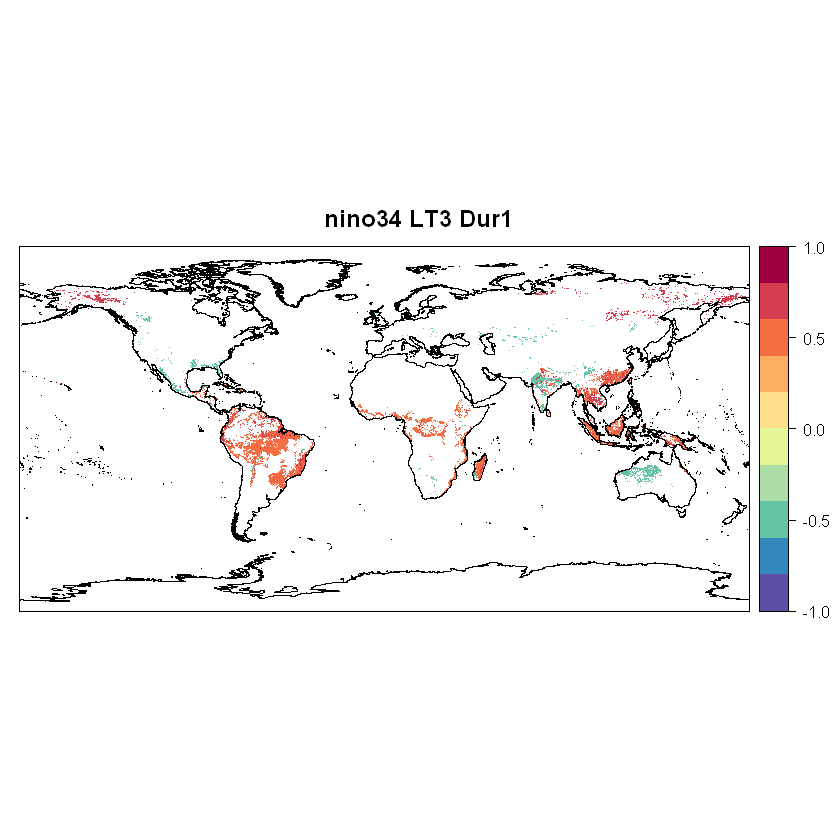

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

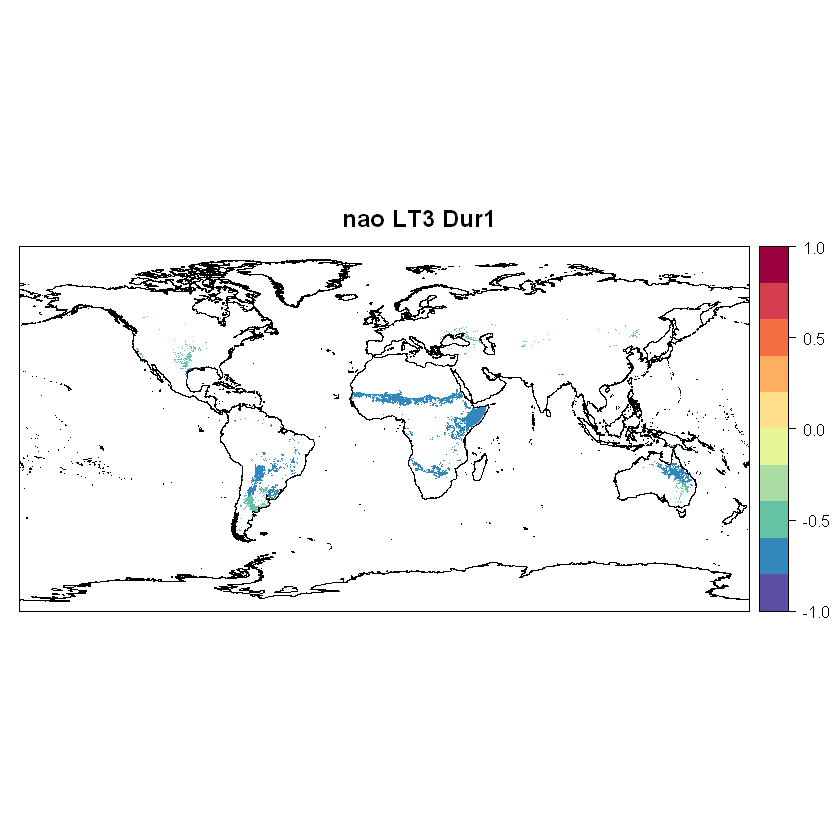

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

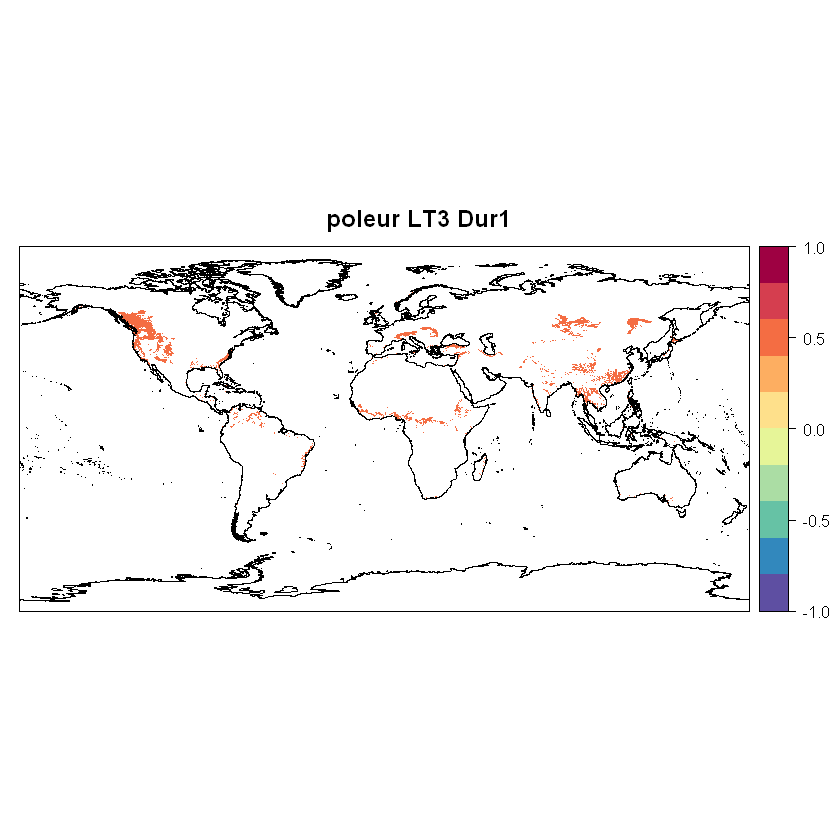

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

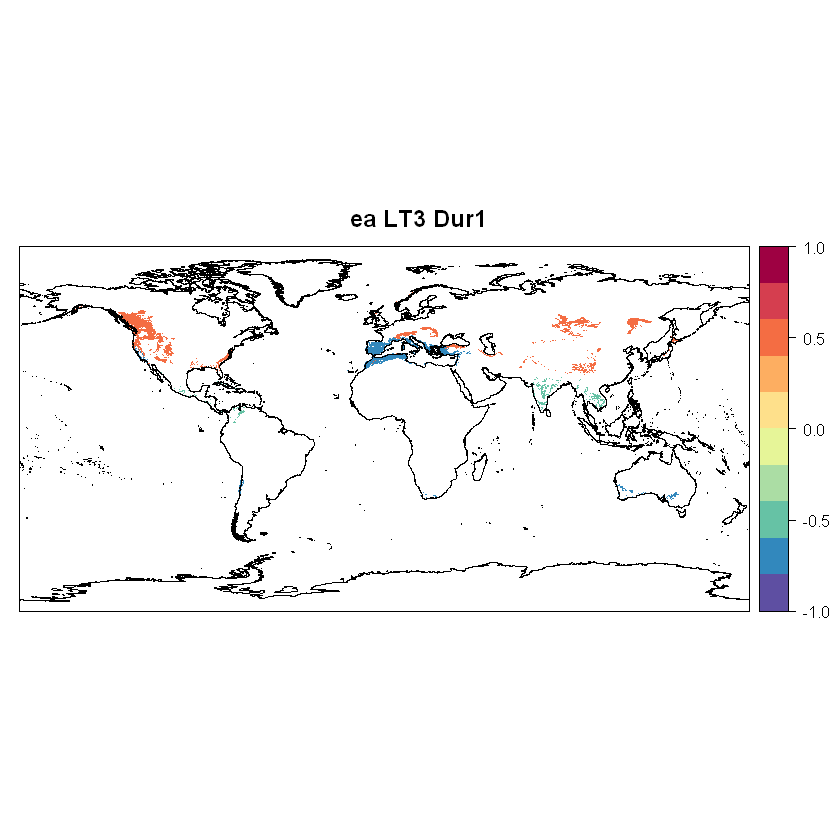

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

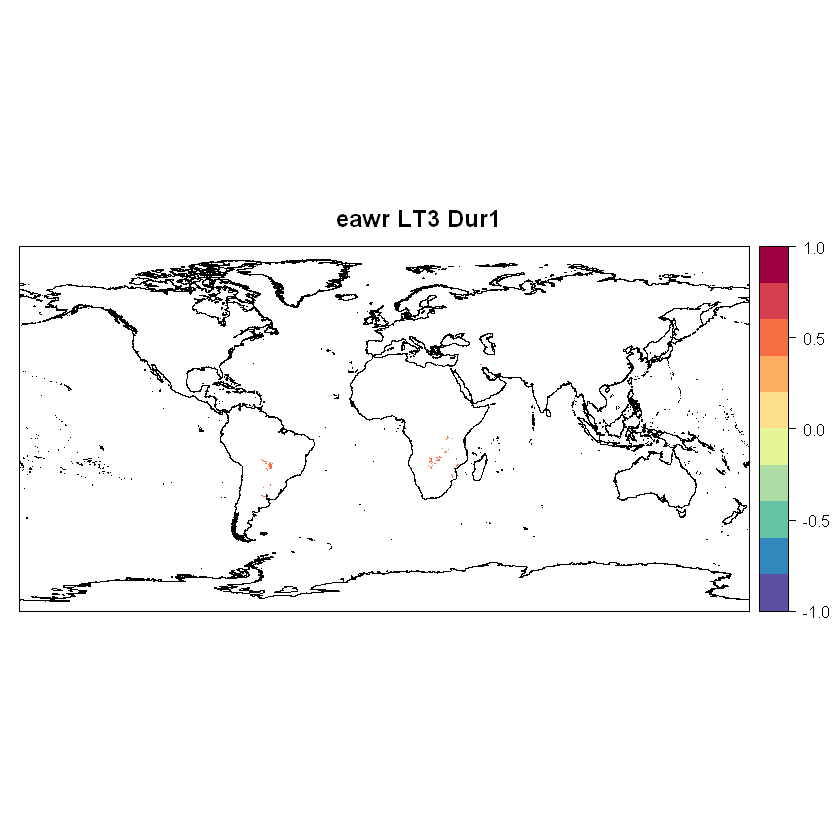

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

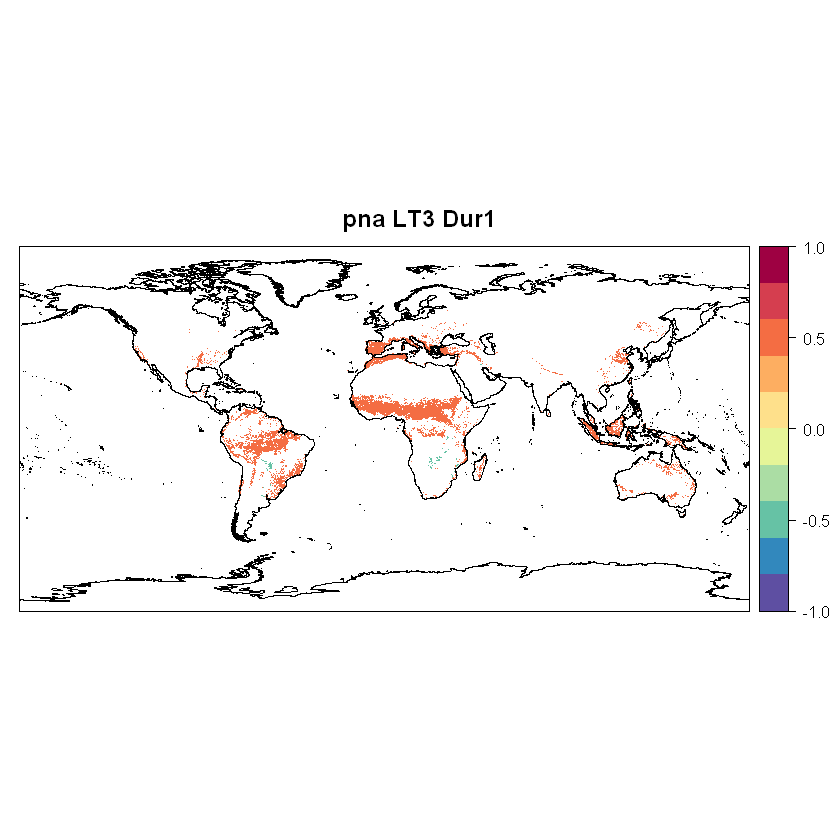

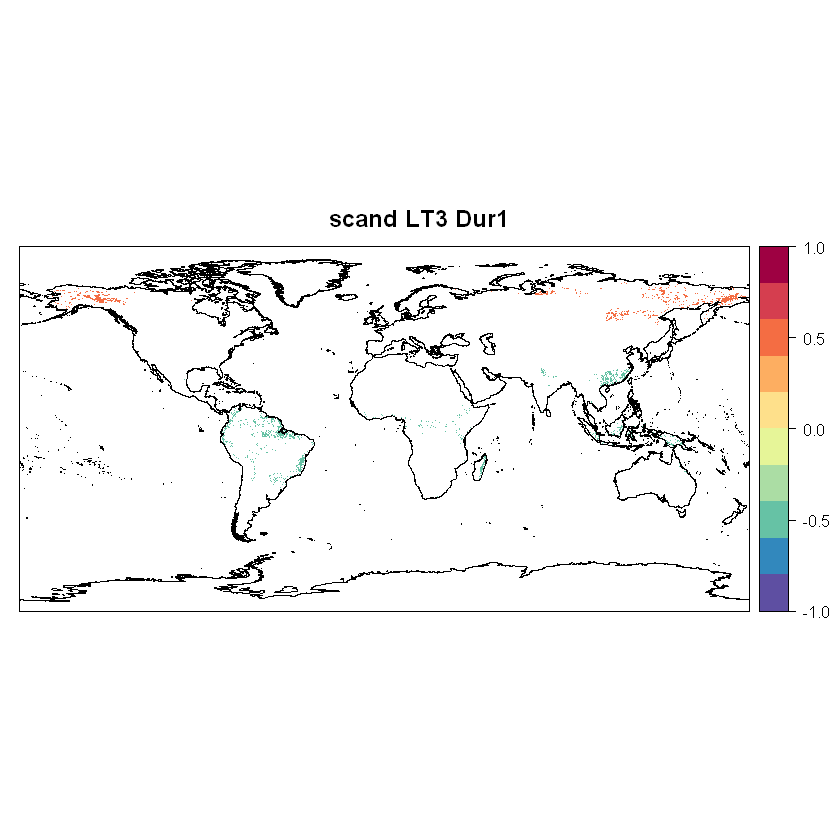

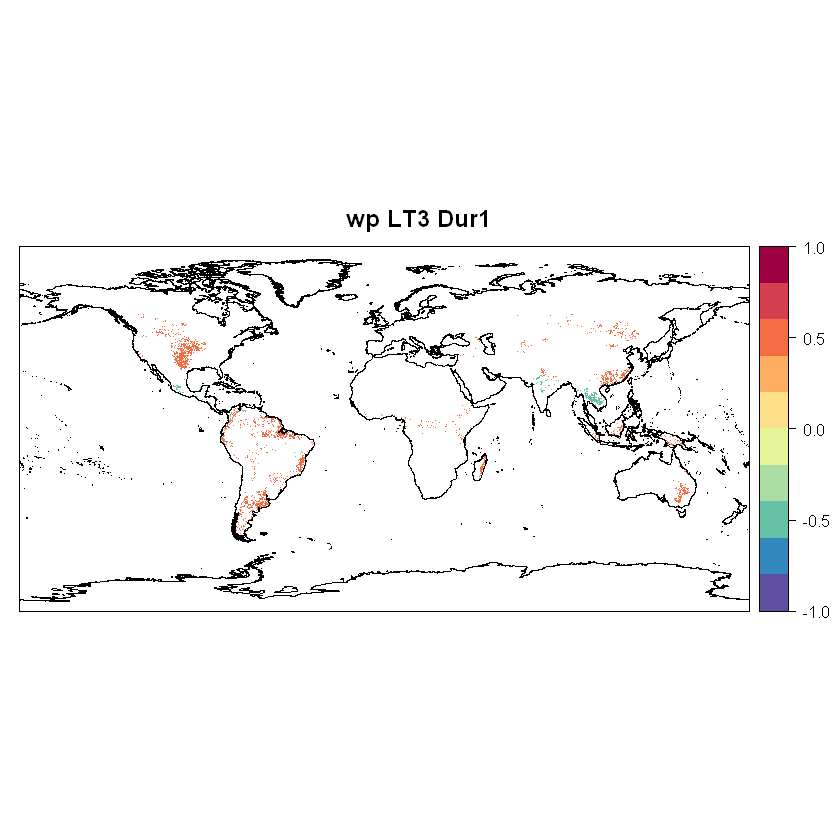

In [19]:
corr.df.lt3.1 = masked_coords
for (i in 1:8){
    corr.df.lt3.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, list.cpcs[[i]],
                                     list.names[i], corr.df.lt3.1, lt=3, duration=1, mode='unimodal')
}
save(corr.df.lt3.1, file = 'data/Correlation/corrDfArticleLT3D1.Rdata')

### 2 months duration

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

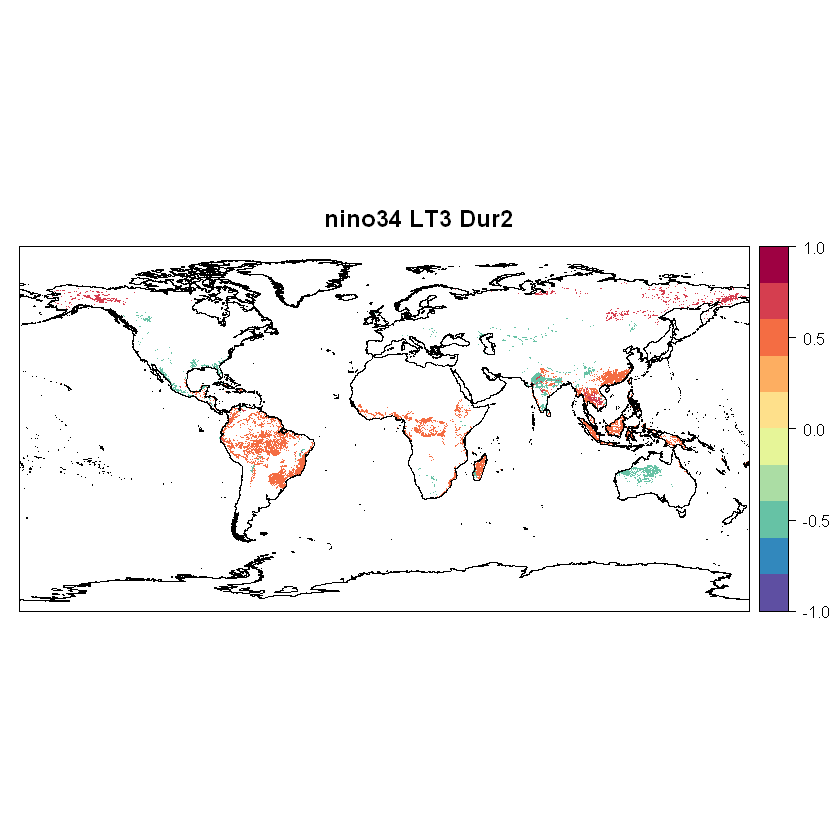

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

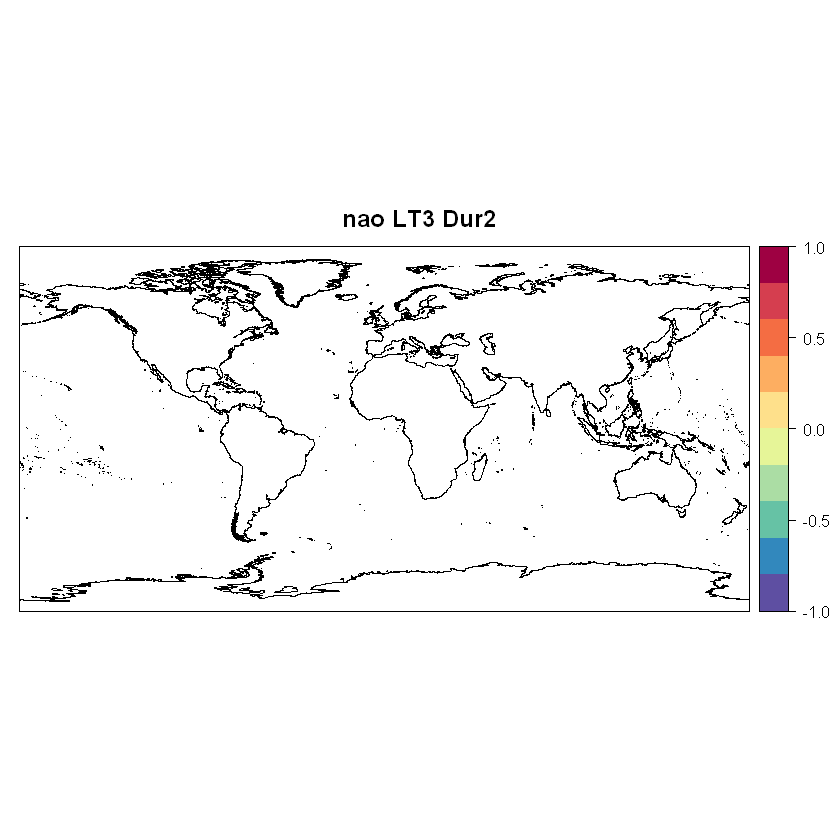

Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

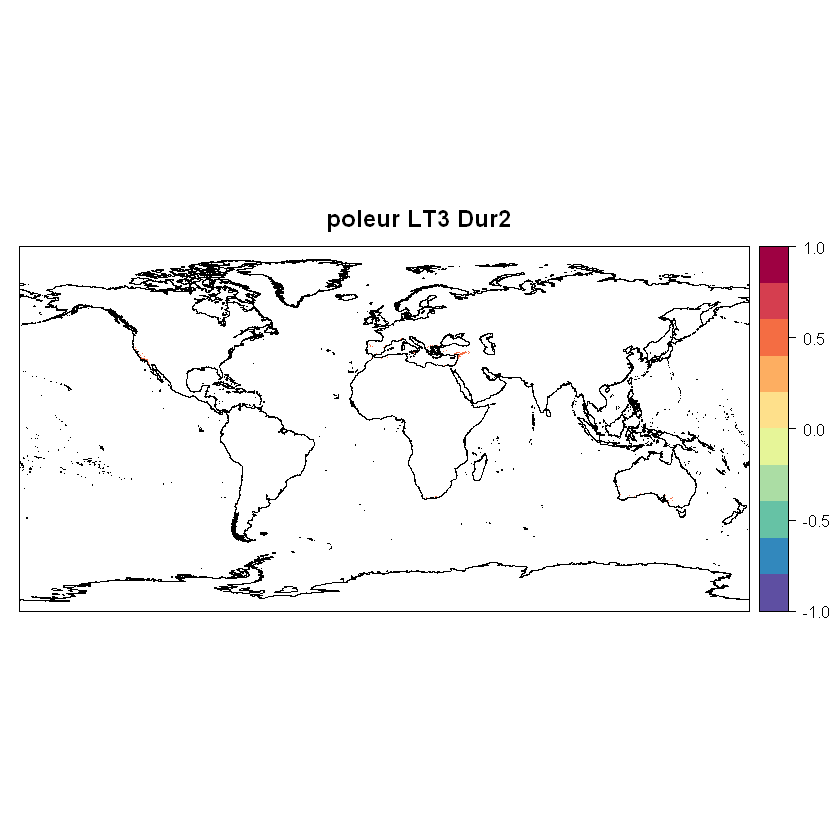

Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

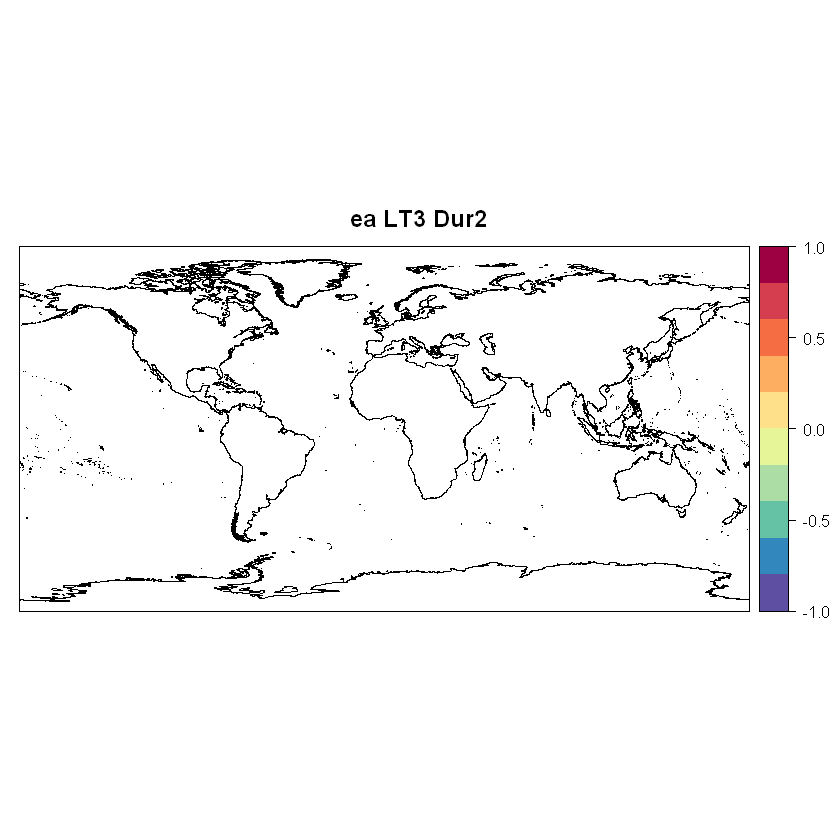

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

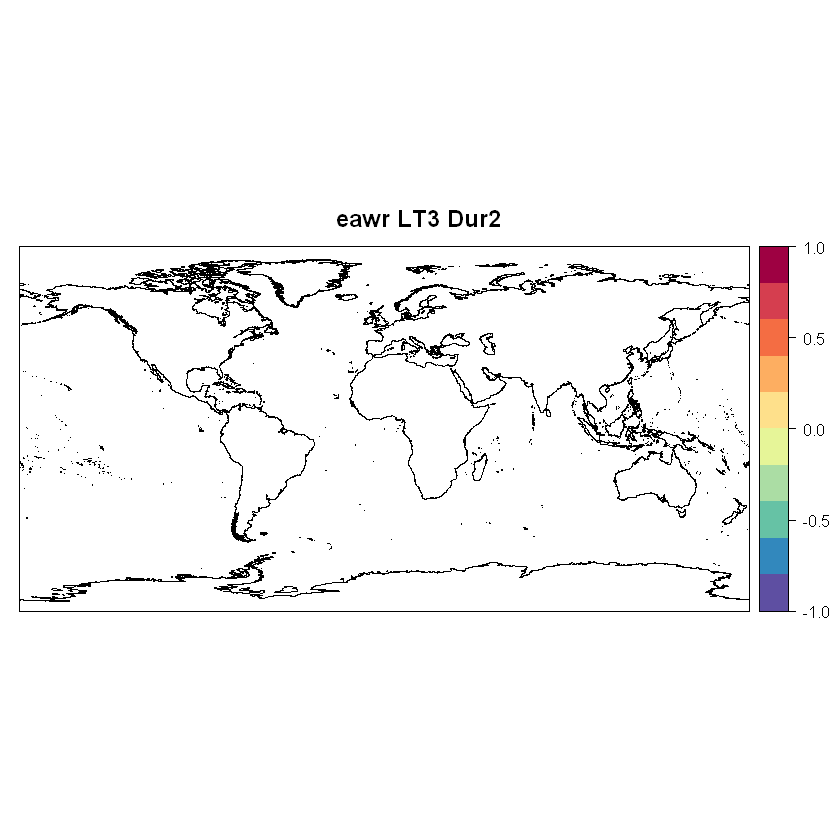

Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

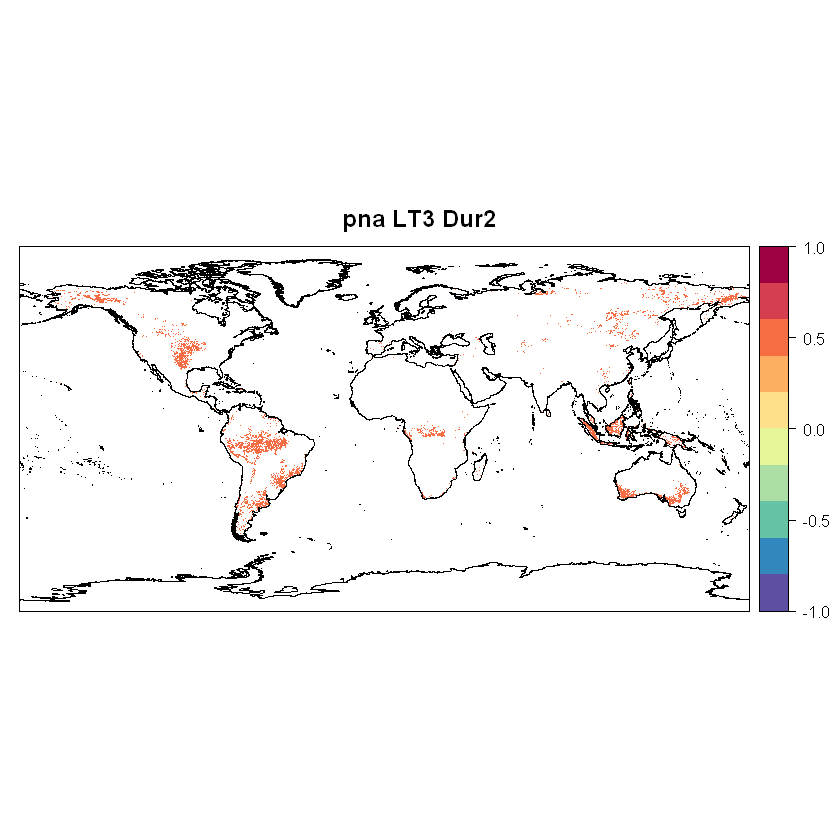

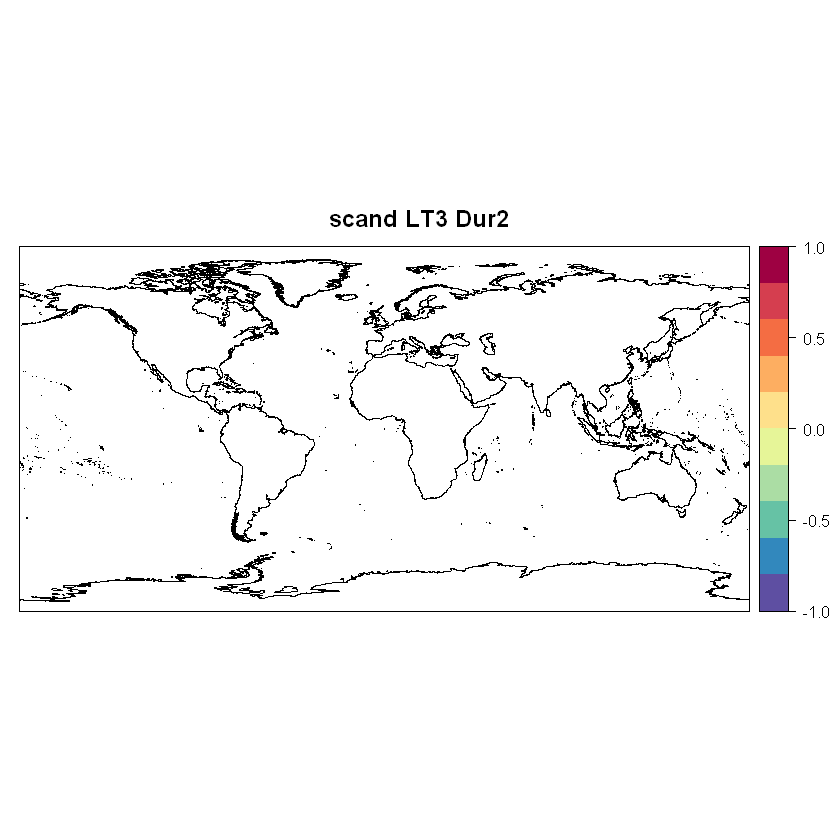

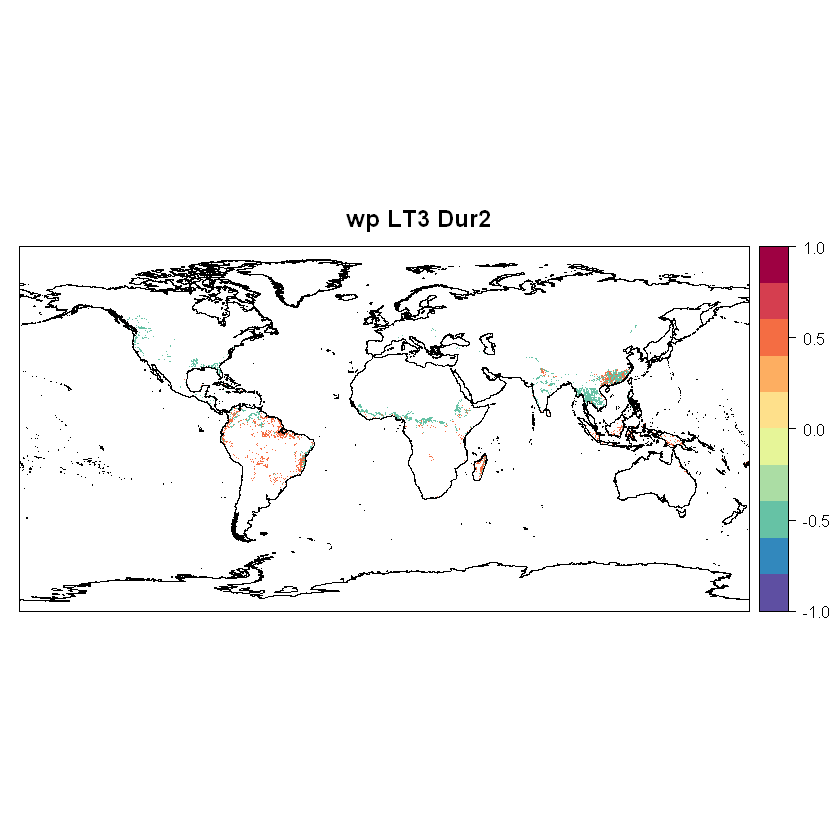

In [20]:
corr.df.lt3.2 = masked_coords
for (i in 1:8){
    corr.df.lt3.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, list.cpcs[[i]], 
                                     list.names[i], corr.df.lt3.2, lt=3, duration=2, mode='unimodal')
}
save(corr.df.lt3.2, file = 'data/Correlation/corrDfArticleLT3D2.Rdata')

### 3 months duration

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

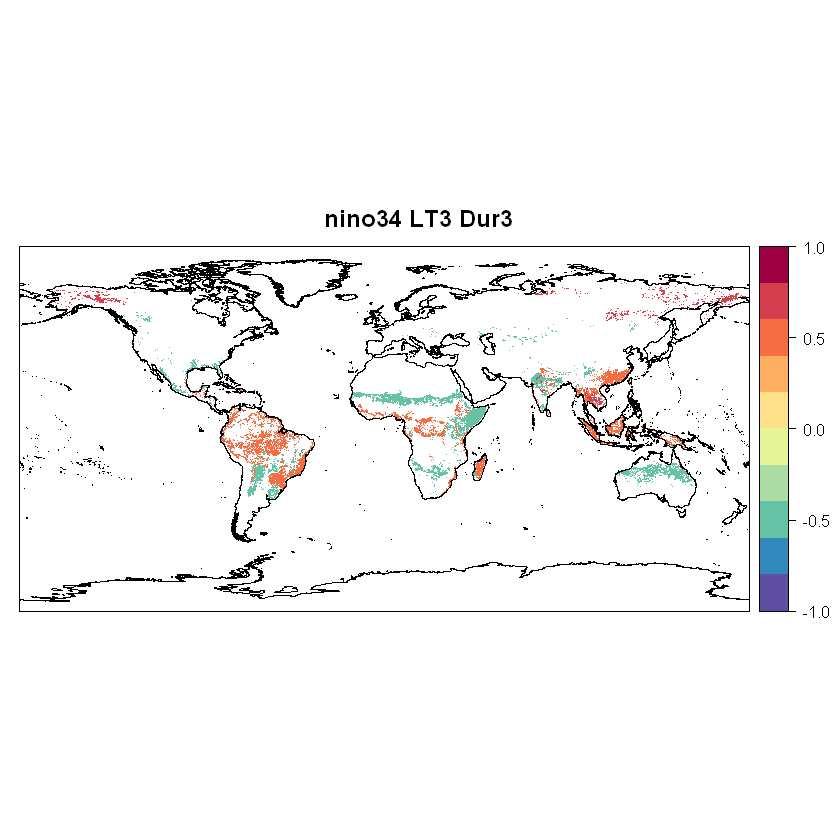

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

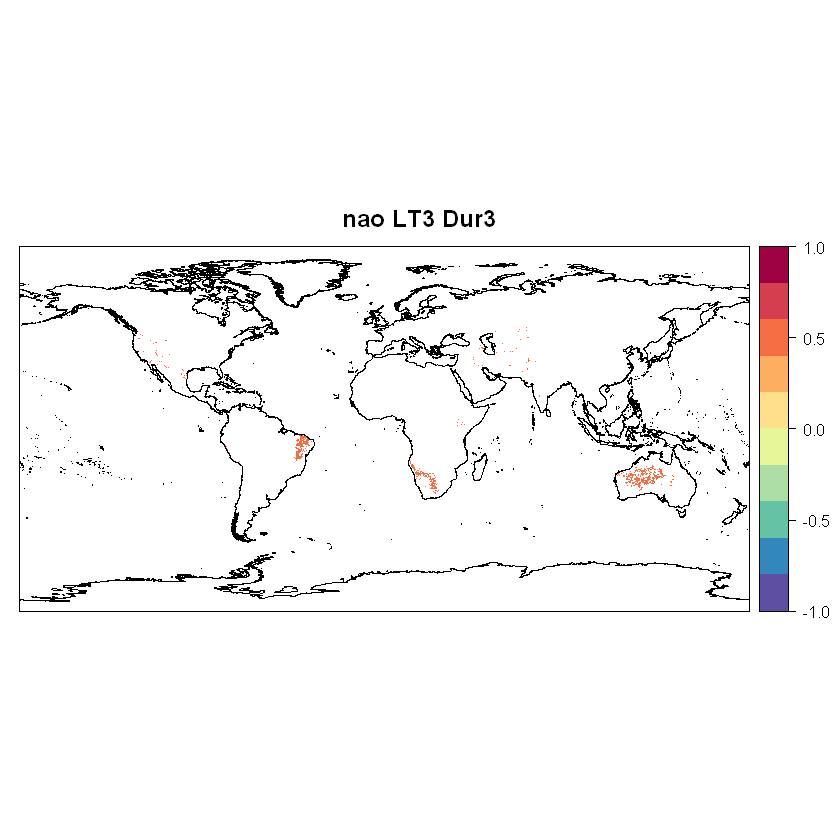

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

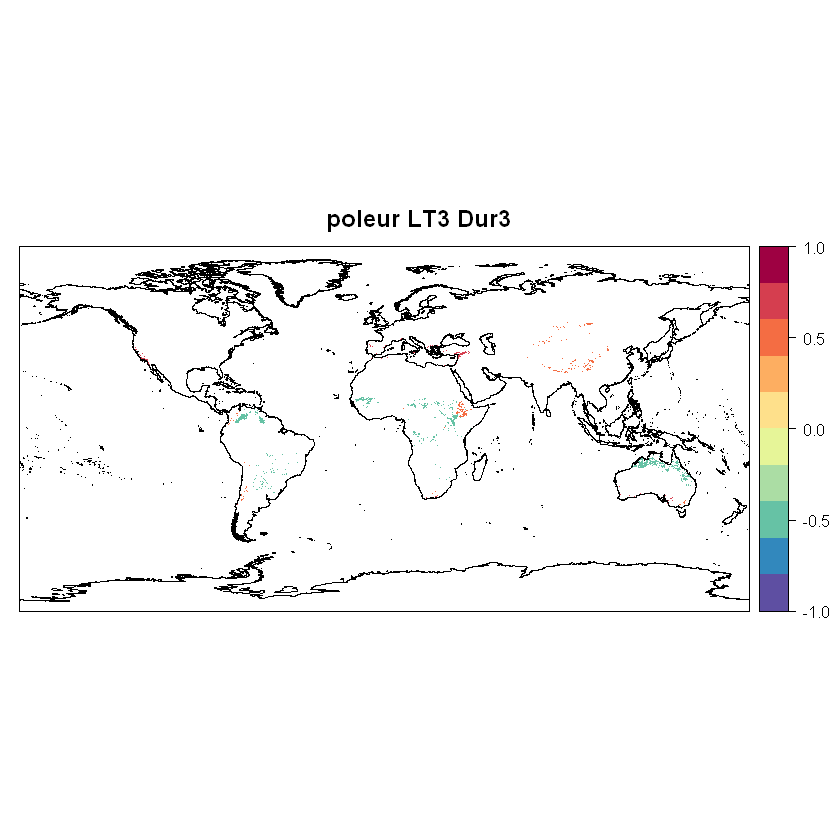

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

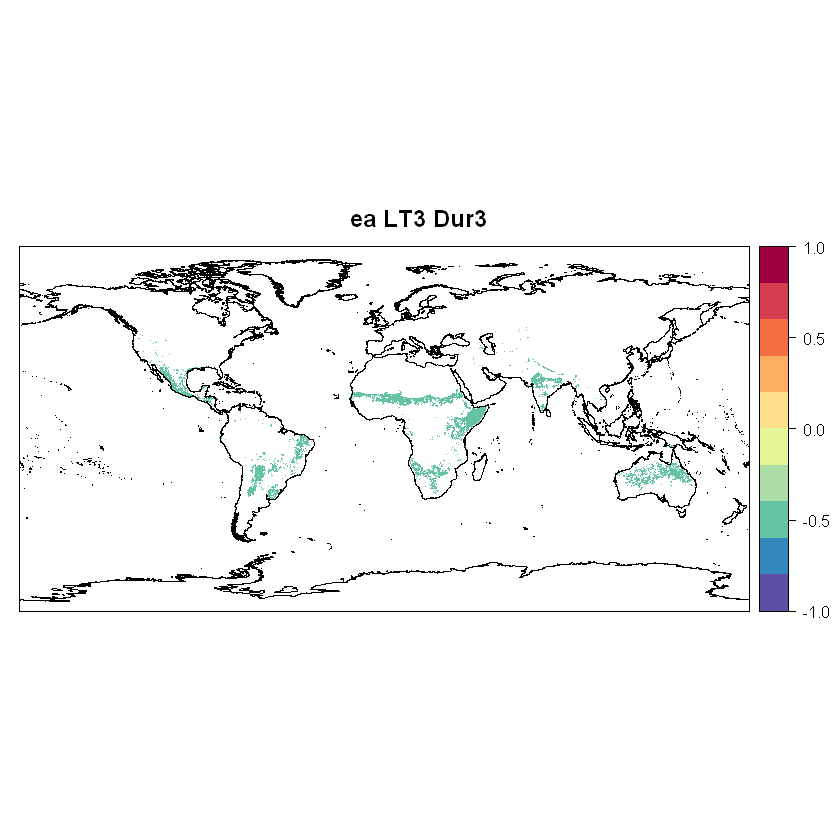

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

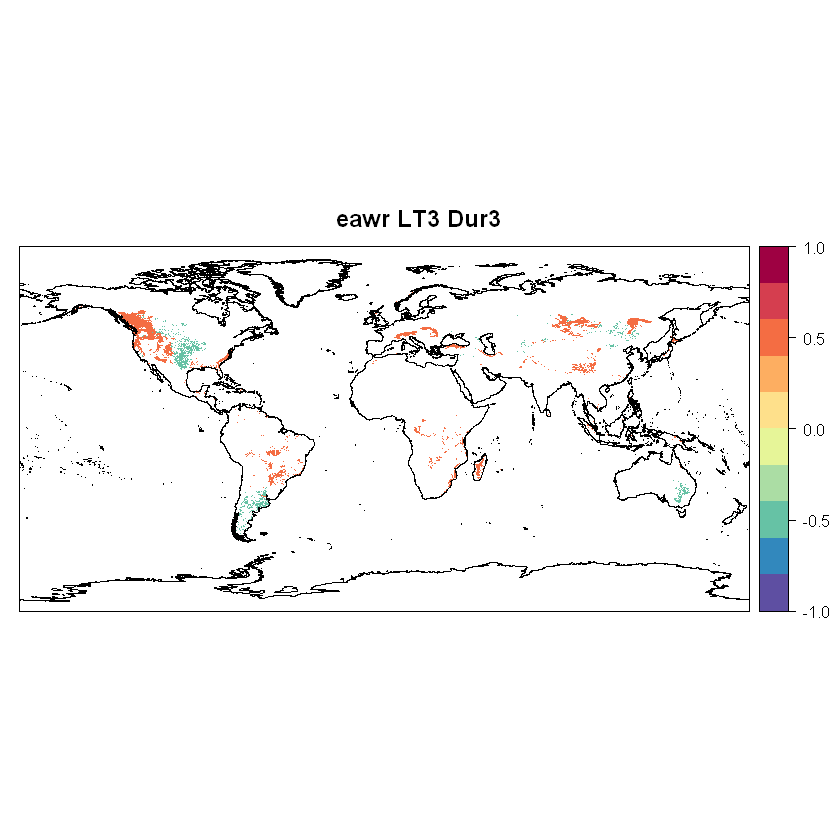

Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

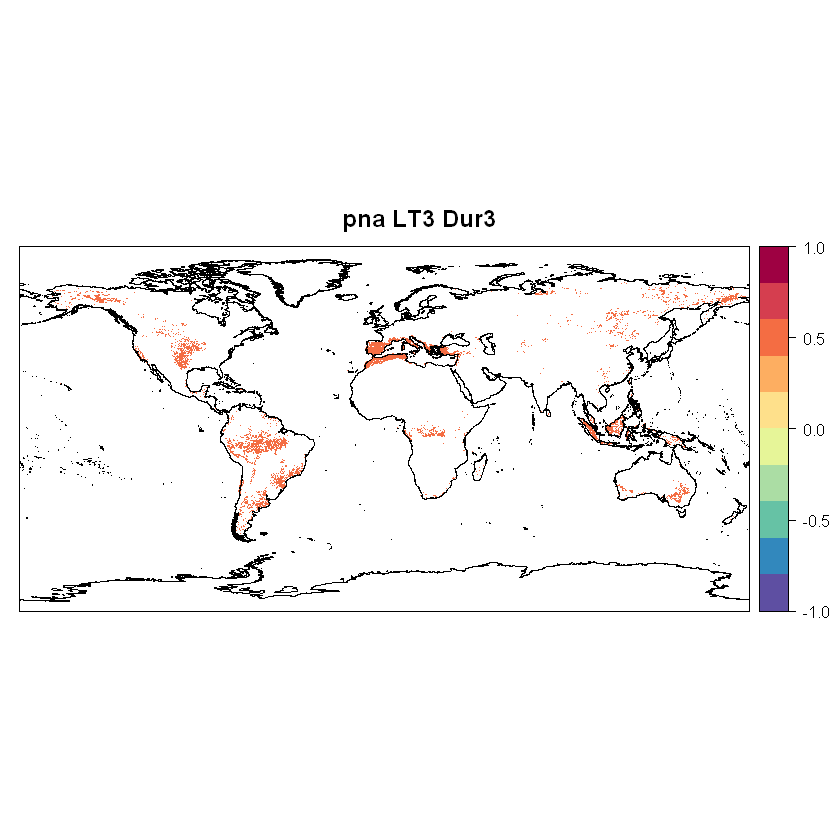

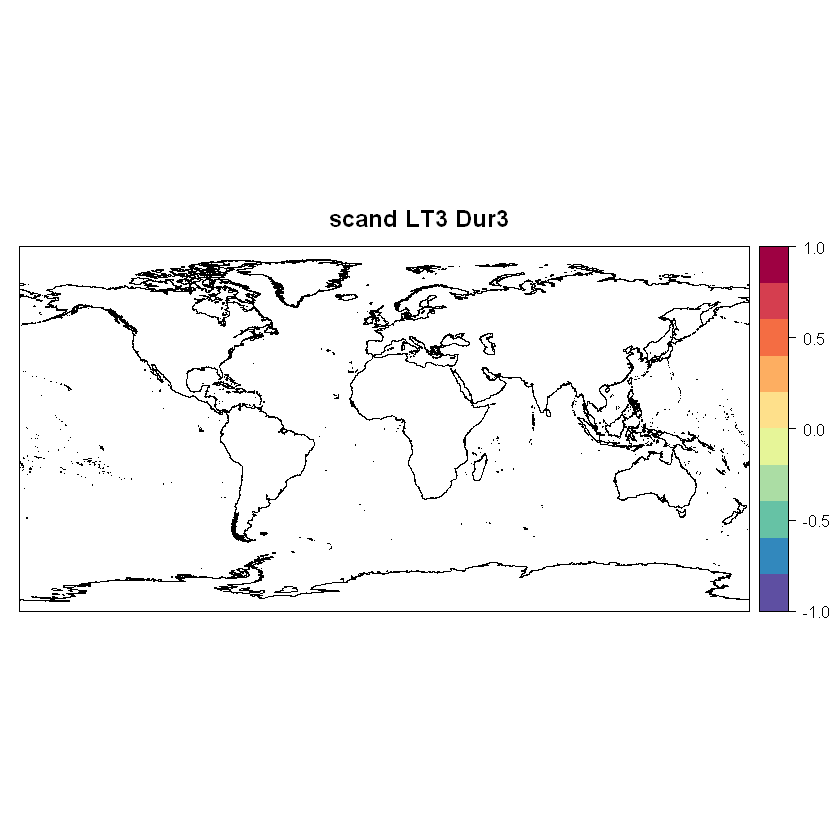

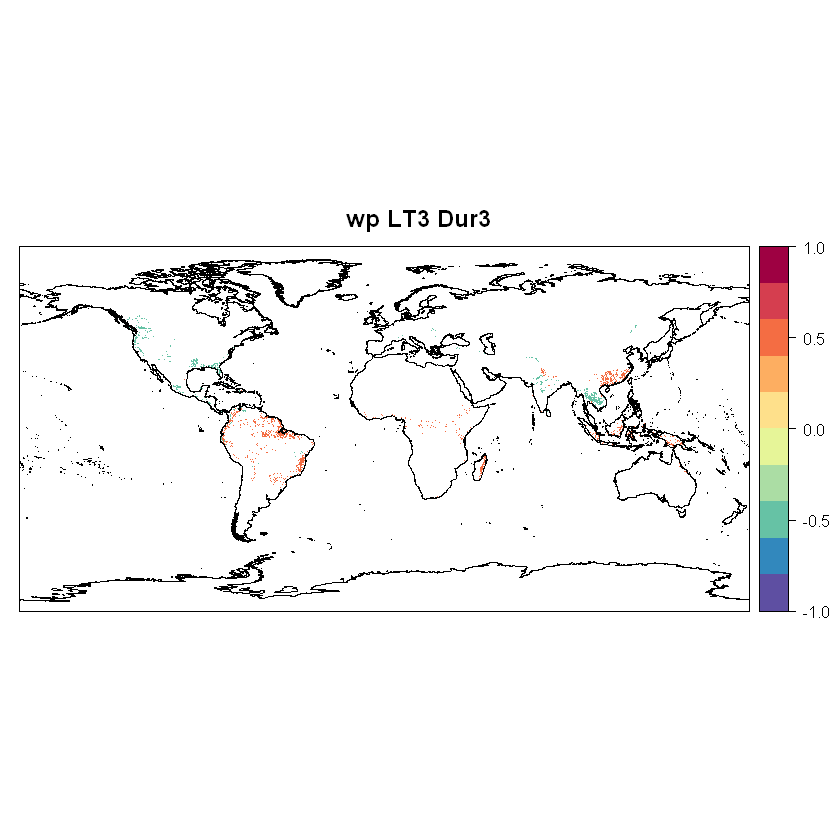

In [21]:
corr.df.lt3.3 = masked_coords
for (i in 1:8){
    corr.df.lt3.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, list.cpcs[[i]],
                                     list.names[i], corr.df.lt3.3, lt=3, duration=3, mode='unimodal')
}
save(corr.df.lt3.3, file = 'data/Correlation/corrDfArticleLT3D3.Rdata')